# **Test Technique**
# Phase 01 : Présentation de la base de données :

## 1.Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

## 2.Import raw data

In [3]:
df = pd.read_parquet('../Data/test_dataset_.parquet',engine= 'fastparquet')


## 3.Size Of Data

In [3]:
df.shape

(7043, 63)

## 4.Field Info && Simple raw data

In [4]:
df.columns

Index(['id_client', 'genre', 'espace_client_web', 'assurance_vie',
       'banque_principale', 'anciennete_mois', 'compte_epargne',
       'credit_autres', 'cartes_bancaires', 'compte_courant', 'compte_joint',
       'PEA', 'assurance_auto', 'assurance_habitation', 'credit_immo', 'type',
       'compte_titres', 'methode_contact', 'agios_6mois',
       'interet_compte_epargne_total', 'age', 'segment_client', 'var_0',
       'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8',
       'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15',
       'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22',
       'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29',
       'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36',
       'var_37', 'var_38', 'branche', 'churn'],
      dtype='object')

### Simple raw data

In [5]:
#this to unlock the column limits
pd.set_option('display.max_columns', None)
#showing head of data
df.head(10)


,id_client,genre,espace_client_web,assurance_vie,banque_principale,anciennete_mois,compte_epargne,credit_autres,cartes_bancaires,compte_courant,compte_joint,PEA,assurance_auto,assurance_habitation,credit_immo,type,compte_titres,methode_contact,agios_6mois,interet_compte_epargne_total,age,segment_client,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,branche,churn
0,3463,H,0.0,non,non,37.0,oui,consommation,medium,oui,non,non,non,oui,non,pro,oui,mail,91.15,3369.25,30.0,A4,3788.182744785004 €,5945.0772668229765 $,10803.089958567847 unk,13030.928518033554 €,16070.855639511765 unk,17019.439851626666 €,22021.785595930363 unk,21216.423899754485 $,23817.283383504626 €,24696.468635896854,nan,29133.8944974518,27300.07116218599,26686.065056015515,29058.92054180535,30081.57564472789,34737.7321427554,35668.424115409725,42088.92319792213,42764.08411395268,1169.512732542452,1476.7350961038942,2906.612116480219,4238.286461028018,6541.289875813533,5604.843019672746,8529.610221848918,6698.67528972128,8299.637103146286,8584.519863007608,8285.480439084165,13545.535937431276,12243.78541470826,12140.590244748311,9013.777747171398,11604.26103631581,16390.41559335645,14631.204898888793,23988.30593086888 unk,NORD-OUEST,non
1,1869,H,0.0,oui,oui,72.0,oui,consommation,premium,inconnu,inconnu,inconnu,inconnu,inconnu,inconnu,nan,non,sms,24.1,1734.65,53.0,B1,13256.48109045188 $,13857.639281781194 unk,16921.648902224817 unk,15994.602589936265 €,19860.270779889997 €,21737.13993144477 $,24324.24424148111 €,27392.12166607259 €,29288.21273487729 €,31119.430165478705,32536.15095836696,33491.89517514227,36037.9868281894,37906.96649480656,37065.72388338147,36662.94313482584,35995.90824275699,38504.55041495392,39879.46169605962,40351.6596482205,4040.767255496318,2893.4384477900285,4522.323311048976,3289.3906116747366,8409.097755410281,5939.488953061257,6615.523133299385,8423.928612341424,9664.847858942348,12811.297554100063,13850.5681563685,14014.989672950887,15508.546833894276,17547.98838067981,15470.524075749094,17537.6284742069,17410.472647675484,21258.90898676071,21554.411100475183 $,NORD-OUEST,non
2,3760,H,0.0,non,non,3.0,oui,nan,medium,non,non,oui,non,non,non,pro,oui,sms,73.6,232.5,41.0,B2,6485.760225438296 €,8854.292447111997 €,14631.403255266534 $,16403.253266119747 $,20053.9103519136 unk,24404.31145555197 €,nan $,nan €,28995.145156507908 $,31381.33231072057,34524.32815825939,37696.13741764853,40010.38945123939,39991.33618089109,42066.099904632494,46159.092725153845,46548.32813376445,49017.79999165477,50879.80009140646,50811.414357484566,641.8881164326261,2194.3860063363586,4719.5572700470375,5592.9233720132825,6652.559764958599,11578.741807441807,10784.182741882849,10408.668590327614,11426.81745171066,11686.025962261105,16764.322563861977,17239.84602598147,19479.32245554088,21343.80238094336,24084.29102629736,25823.493342701968,25839.82975222592,25587.81497626097,29736.376225687185 €,NORD-OUEST,non
3,3820,H,1.0,oui,non,72.0,oui,consommation,medium,oui,oui,oui,oui,nan,oui,pro,oui,sms,112.9,8061.5,44.0,C4,3023.518886187192 $,3657.2803812584334 unk,3583.864370206904 $,7048.335850812753 $,10851.522504543907 €,13233.44946850318 unk,17043.44544044993 unk,17315.324866115294 €,18409.009199891923 unk,20992.13626113548,25680.971635585003,26021.839063119794,28987.451965657936,28467.73352267931,30863.43709851856,nan,35443.44296369651,42466.1572134141,47617.66952689358,50441.09453435987,846.5880085298712,300.64789266989465,nan,623.554669320613,1411.5341412533223,2919.154899144427,4837.868423530637,6297.571985341308,4694.966743933823,8601.779272932823,6895.959437474563,9229.470887346755,11935.244778726366,11014.748509156729,11791.35354185054,16354.05136650618,15449.9674945138,21149.78993303937,29211.314802785902 $,NORD-OUEST,non
4,1463,F,0.0,non,non,4.0,oui,pe

## 5.Here to check the data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id_client                     7043 non-null   object
 1   genre                         7043 non-null   object
 2   espace_client_web             7043 non-null   object
 3   assurance_vie                 7043 non-null   object
 4   banque_principale             7043 non-null   object
 5   anciennete_mois               7043 non-null   object
 6   compte_epargne                7043 non-null   object
 7   credit_autres                 7043 non-null   object
 8   cartes_bancaires              7043 non-null   object
 9   compte_courant                7043 non-null   object
 10  compte_joint                  7043 non-null   object
 11  PEA                           7043 non-null   object
 12  assurance_auto                7043 non-null   object
 13  assurance_habitati

### Columns Overview
- The dataset has 5000+ rows and 65+ columns. 
- `id_client` is a unique identifier for each client. 
- All columns are currently of type `object`, even those that should be numeric.  
- The dataset contains **a mix of labeled (categorical) and numeric variables**, but due to formatting issues, numeric variables are stored as objects.  
- Labeled / categorical columns include `genre`, `type`, `segment_client`, `branche`, `churn`, etc.  
- Numeric variables (e.g., `age`, `anciennete_mois`, `agios_6mois`, `interet_compte_epargne_total`, `var_0` … `var_38`) are incorrectly stored as object because they contain symbols (`€`, `$`), text (`unk`, `nan`) or yes/no labels.  


## 6.check fo null values


In [7]:
df.isnull().sum()

id_client            0
genre                0
espace_client_web    0
assurance_vie        0
banque_principale    0
                    ..
var_36               0
var_37               0
var_38               0
branche              0
churn                0
Length: 63, dtype: int64

#### I observed that missing data in the dataset is represented as the string `"nan"` instead of actual `NaN` values recognized by pandas.  

In [8]:
df_eda = df.copy() # here i made copy to avoid changing the Main data
#here to replace this values with NaN to make esasy to detect Null
null_like_tokens = ['nan', 'NaN', 'unk', 'unknown', 'inconnu', 'INCONNU'] 
df_eda.replace(null_like_tokens, np.nan, inplace=True) #this will treat nan as null so : 
df_eda.isnull().sum()[df_eda.isnull().sum() > 0] #here used this because have so muc columns 


genre                            128
espace_client_web                127
assurance_vie                    131
banque_principale                122
anciennete_mois                  134
compte_epargne                   149
credit_autres                    127
cartes_bancaires                 150
compte_courant                  1638
compte_joint                    1624
PEA                             1632
assurance_auto                  1639
assurance_habitation            1637
credit_immo                     1640
type                            1807
compte_titres                    130
methode_contact                  148
agios_6mois                      147
interet_compte_epargne_total     130
age                              154
segment_client                   157
var_9                            139
var_10                           137
var_11                           134
var_12                           129
var_13                           134
var_14                           153
v

## 7.Percentage of null data 
### Missing Values Check

- Most columns have **very few missing values** (around 1–2%).  
- Columns `compte_courant`, `compte_joint`, `PEA`, `assurance_auto`, `assurance_habitation`, `credit_immo` have around **23% missing values** (these contain "inconnu and Nan" values).  
- The column `type` has the highest missing rate, around **25%**.


In [9]:
((df_eda.isnull().sum() / len(df)) * 100) [df_eda.isnull().sum() > 0]

genre                            1.817407
espace_client_web                1.803209
assurance_vie                    1.860003
banque_principale                1.732216
anciennete_mois                  1.902598
compte_epargne                   2.115576
credit_autres                    1.803209
cartes_bancaires                 2.129774
compte_courant                  23.257135
compte_joint                    23.058356
PEA                             23.171944
assurance_auto                  23.271333
assurance_habitation            23.242936
credit_immo                     23.285532
type                            25.656680
compte_titres                    1.845804
methode_contact                  2.101377
agios_6mois                      2.087179
interet_compte_epargne_total     1.845804
age                              2.186568
segment_client                   2.229164
var_9                            1.973591
var_10                           1.945194
var_11                           1

### here we check if we have duplicate values 

In [10]:
df.duplicated().sum()

np.int64(0)

## 8.Check Column Values

### 8.1.Separate Categorical vs Numeric Columns


In [97]:
# List of categorical columns
categorical_cols = ['genre', 'type', 'segment_client', 'branche', 'churn',
                    'espace_client_web', 'assurance_vie', 'banque_principale',
                    'compte_epargne', 'credit_autres', 'cartes_bancaires',
                    'compte_courant', 'compte_joint', 'PEA', 'assurance_auto',
                    'assurance_habitation', 'credit_immo', 'compte_titres', 
                    'methode_contact']

# Numeric columns 
numeric_cols = ['anciennete_mois', 'agios_6mois', 'interet_compte_epargne_total',
                'age'] + [f'var_{i}' for i in range(39)]

#### Remove symbols, convert to numeric, handle invalid values:

In [12]:
#here this modification are happening in the fd_eda which is acopy of originale data frame (df)
for col in numeric_cols:
    df_eda[col] = pd.to_numeric(df_eda[col].astype(str).str.replace('[€$,]', '', regex=True), errors='coerce')


### 8.2.Analyze Categorical Variables

--- genre ---
genre
H      3499
F      3416
NaN     128
Name: count, dtype: int64
genre
H    50.600145
F    49.399855
Name: proportion, dtype: float64


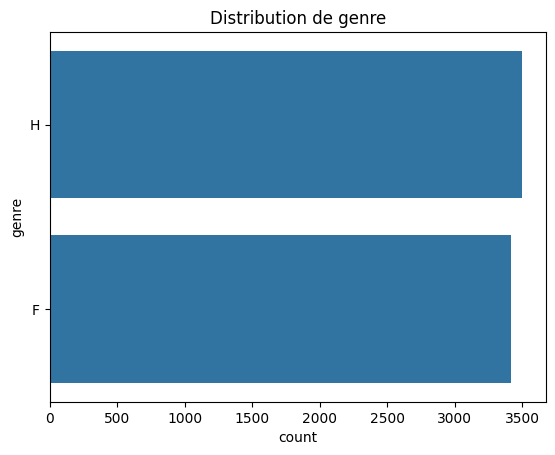

--- type ---
type
pro      3794
NaN      1807
perso    1442
Name: count, dtype: int64
type
pro      72.459893
perso    27.540107
Name: proportion, dtype: float64


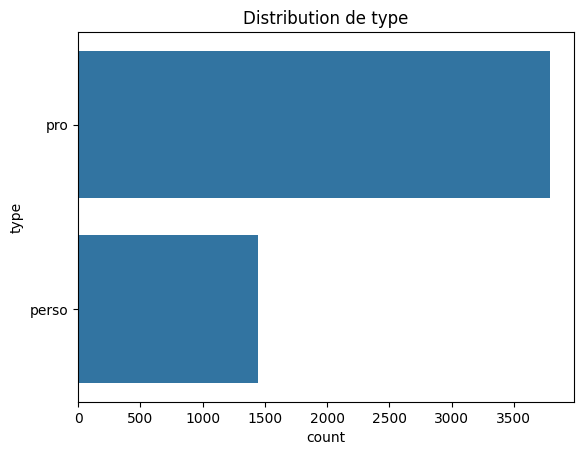

--- segment_client ---
segment_client
B2     720
A1     713
D1     711
C1     708
B1     681
C4     675
C2     651
A4     645
C3     638
NaN    157
B4     128
A3     126
B3     123
A2     123
D2     123
D3     121
Name: count, dtype: int64
segment_client
B2    10.455998
A1    10.354342
D1    10.325298
C1    10.281731
B1     9.889631
C4     9.802498
C2     9.453965
A4     9.366831
C3     9.265176
B4     1.858844
A3     1.829800
B3     1.786233
A2     1.786233
D2     1.786233
D3     1.757188
Name: proportion, dtype: float64


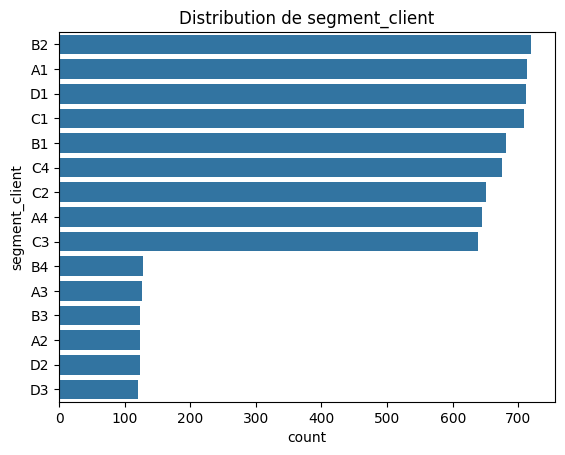

--- branche ---
branche
NORD-EST      1229
OUTRE-MER     1227
SUD-EST       1202
CENTRE        1188
SUD-OUEST     1161
NORD-OUEST     907
NaN            129
Name: count, dtype: int64
branche
NORD-EST      17.775528
OUTRE-MER     17.746601
SUD-EST       17.385016
CENTRE        17.182528
SUD-OUEST     16.792016
NORD-OUEST    13.118311
Name: proportion, dtype: float64


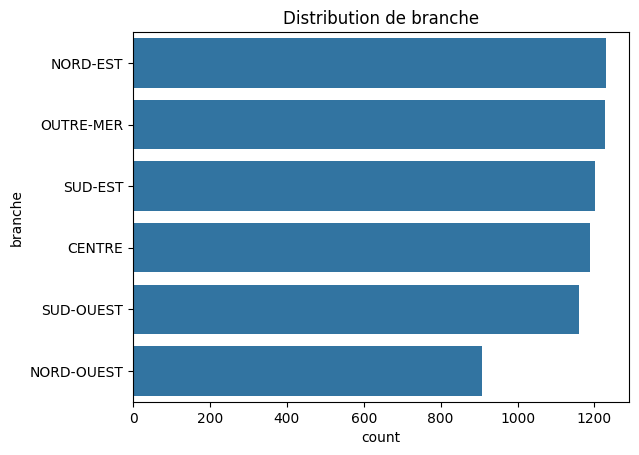

--- churn ---
churn
non    5174
oui    1869
Name: count, dtype: int64
churn
non    73.463013
oui    26.536987
Name: proportion, dtype: float64


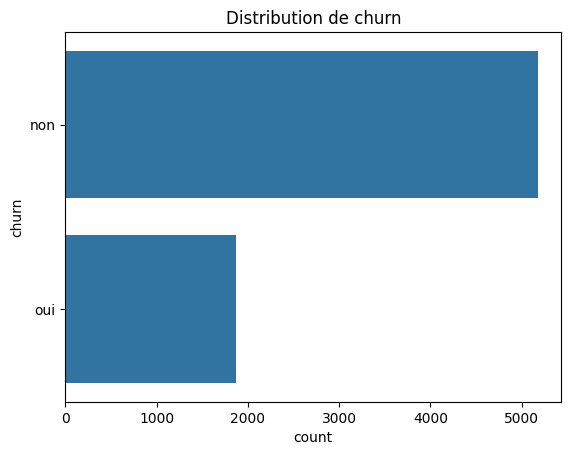

--- espace_client_web ---
espace_client_web
0.0    5791
1.0    1125
NaN     127
Name: count, dtype: int64
espace_client_web
0.0    83.733372
1.0    16.266628
Name: proportion, dtype: float64


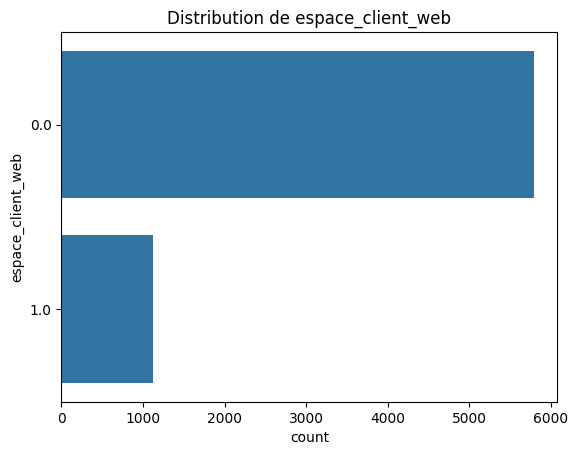

--- assurance_vie ---
assurance_vie
non    3578
oui    3334
NaN     131
Name: count, dtype: int64
assurance_vie
non    51.765046
oui    48.234954
Name: proportion, dtype: float64


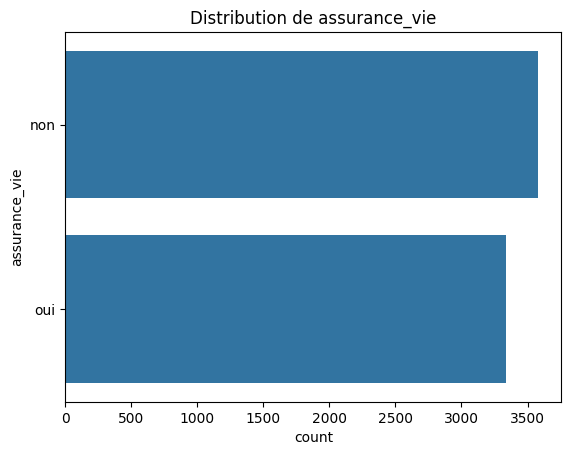

--- banque_principale ---
banque_principale
non    4854
oui    2067
NaN     122
Name: count, dtype: int64
banque_principale
non    70.134374
oui    29.865626
Name: proportion, dtype: float64


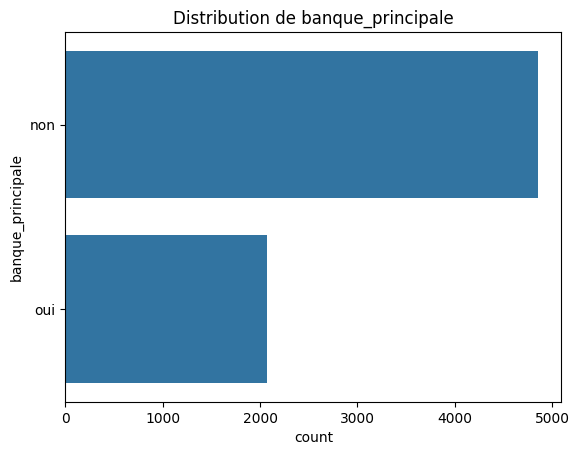

--- compte_epargne ---
compte_epargne
oui    6226
non     668
NaN     149
Name: count, dtype: int64
compte_epargne
oui    90.310415
non     9.689585
Name: proportion, dtype: float64


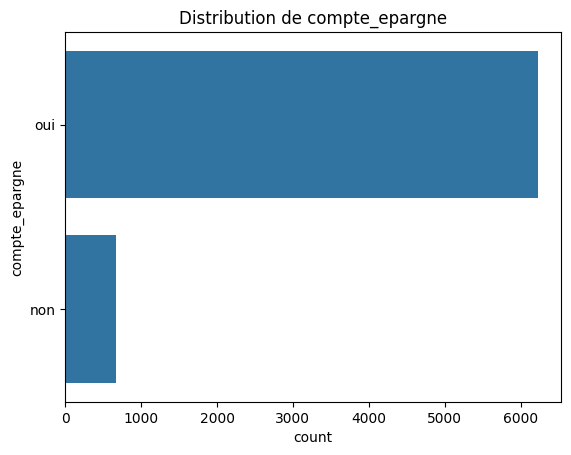

--- credit_autres ---
credit_autres
permanent       3330
consommation    2916
bail             670
NaN              127
Name: count, dtype: int64
credit_autres
permanent       48.149219
consommation    42.163100
bail             9.687681
Name: proportion, dtype: float64


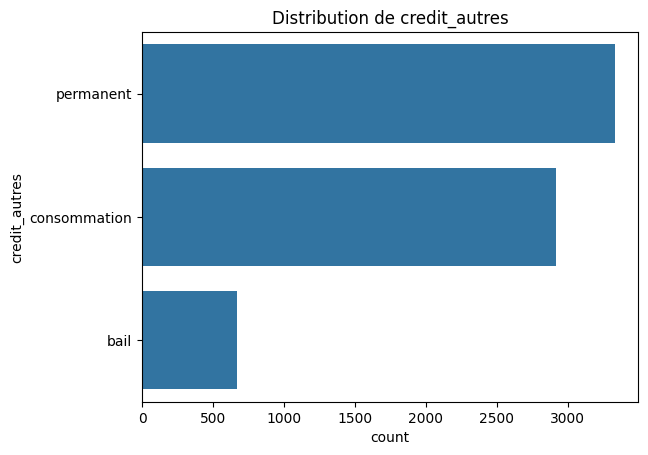

--- cartes_bancaires ---
cartes_bancaires
medium     3029
basic      2375
premium    1489
NaN         150
Name: count, dtype: int64
cartes_bancaires
medium     43.943131
basic      34.455244
premium    21.601625
Name: proportion, dtype: float64


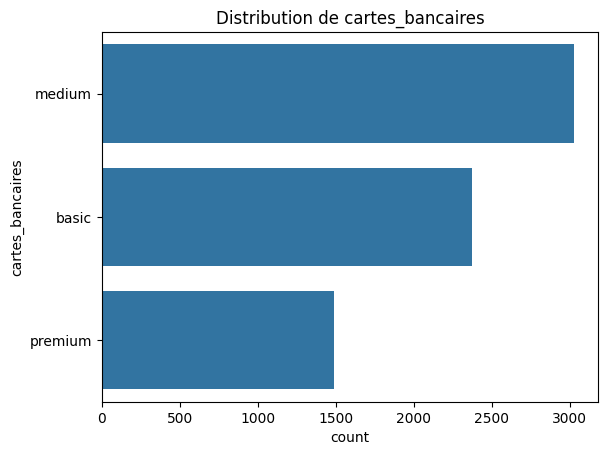

--- compte_courant ---
compte_courant
non    3424
oui    1981
NaN    1638
Name: count, dtype: int64
compte_courant
non    63.348751
oui    36.651249
Name: proportion, dtype: float64


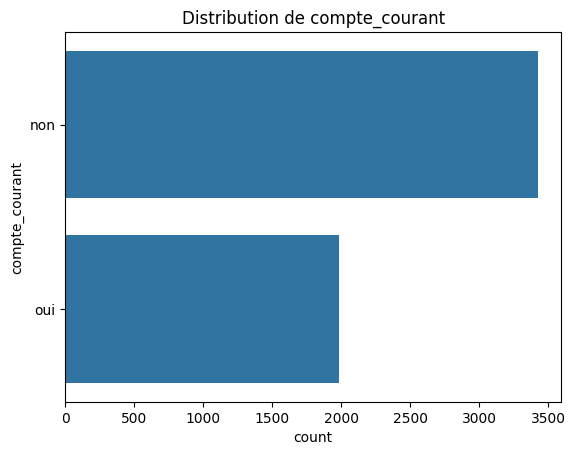

--- compte_joint ---
compte_joint
non    3027
oui    2392
NaN    1624
Name: count, dtype: int64
compte_joint
non    55.859015
oui    44.140985
Name: proportion, dtype: float64


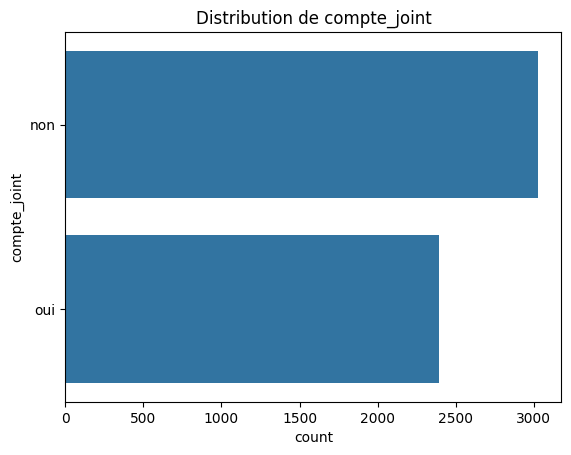

--- PEA ---
PEA
non    3034
oui    2377
NaN    1632
Name: count, dtype: int64
PEA
non    56.070967
oui    43.929033
Name: proportion, dtype: float64


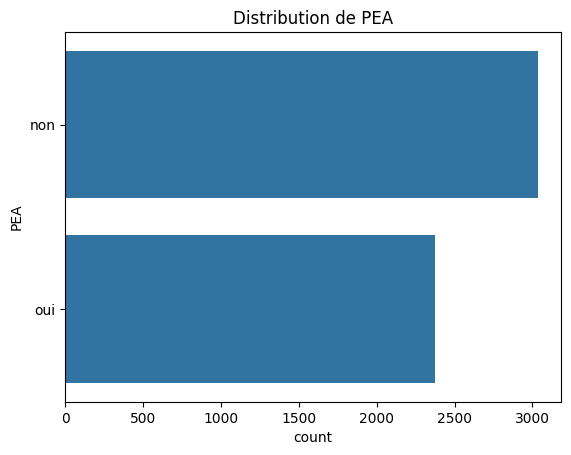

--- assurance_auto ---
assurance_auto
non    3402
oui    2002
NaN    1639
Name: count, dtype: int64
assurance_auto
non    62.953368
oui    37.046632
Name: proportion, dtype: float64


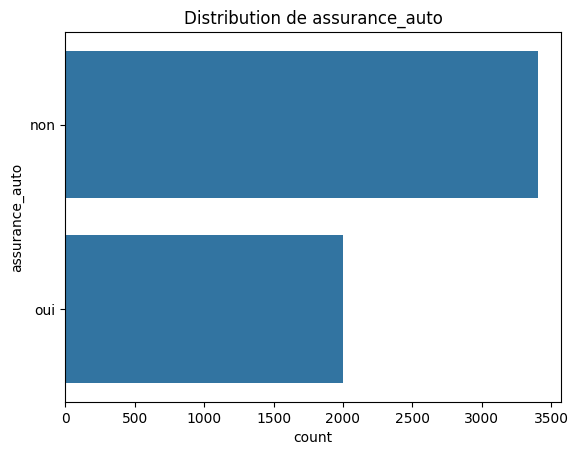

--- assurance_habitation ---
assurance_habitation
non    2752
oui    2654
NaN    1637
Name: count, dtype: int64
assurance_habitation
non    50.9064
oui    49.0936
Name: proportion, dtype: float64


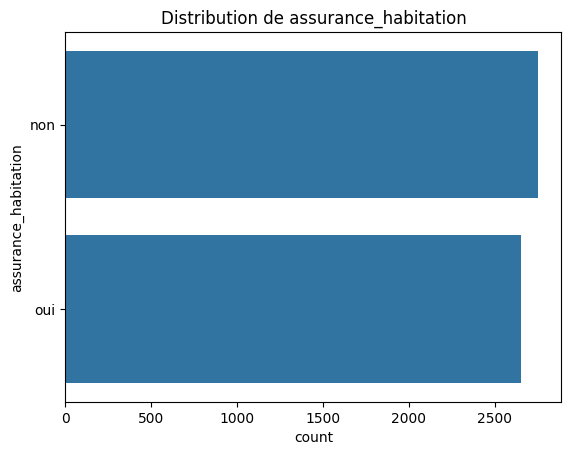

--- credit_immo ---
credit_immo
non    2718
oui    2685
NaN    1640
Name: count, dtype: int64
credit_immo
non    50.305386
oui    49.694614
Name: proportion, dtype: float64


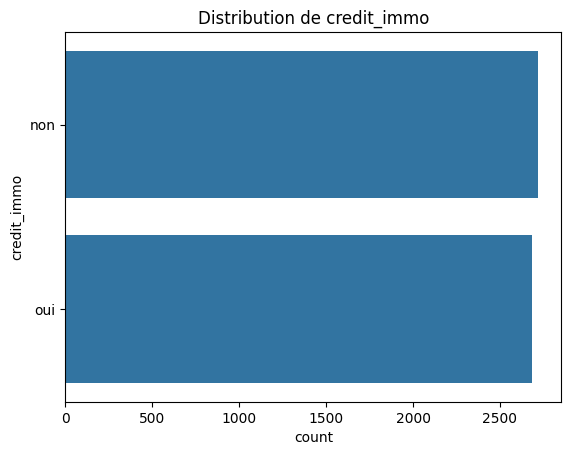

--- compte_titres ---
compte_titres
oui    4098
non    2815
NaN     130
Name: count, dtype: int64
compte_titres
oui    59.279618
non    40.720382
Name: proportion, dtype: float64


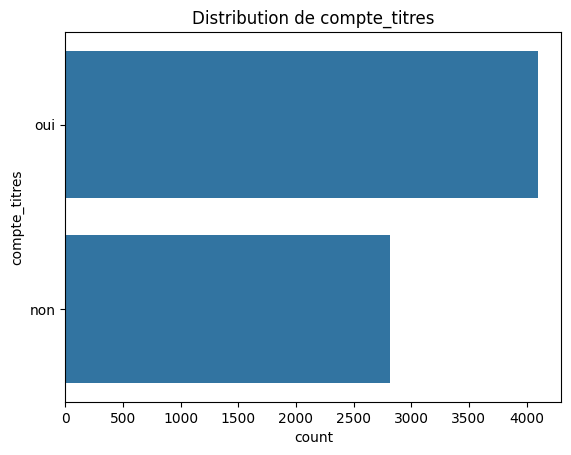

--- methode_contact ---
methode_contact
mail         2315
courrier     1588
telephone    1507
sms          1485
NaN           148
Name: count, dtype: int64
methode_contact
mail         33.575054
courrier     23.031182
telephone    21.856418
sms          21.537346
Name: proportion, dtype: float64


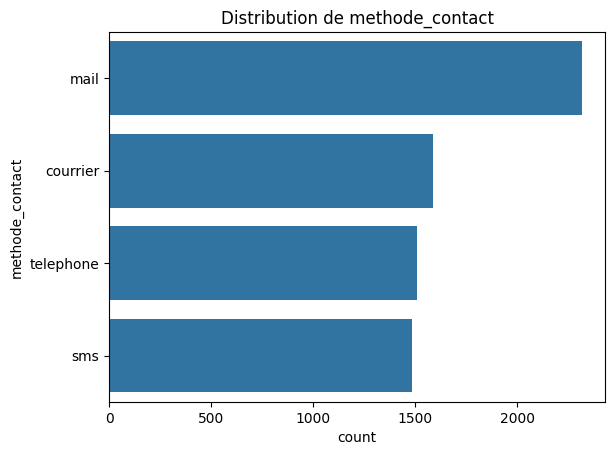

In [13]:
for col in categorical_cols:
    print(f"--- {col} ---")
    print(df_eda[col].value_counts(dropna=False))
    print(df_eda[col].value_counts(normalize=True) * 100)  # percentages
    sns.countplot(y=col, data=df_eda, order=df_eda[col].value_counts().index)
    plt.title(f"Distribution de {col}")
    plt.show()

### Results

**Genre:**  
Almost evenly split between H (50.6%) and F (49.4%).  
Only 128 missing values (~1.8%), so very few missing data.

**Type:**  
`pro` is dominant (72.5%) over `perso` (27.5%).  
A significant proportion of missing values (~25%), so this column has a noticeable gap.

**Segment_client:**  
B2, A1, D1, and C1 are the most frequent segments (~10% each).  
Other segments have much lower frequency (1.7–1.8%), and there are 157 missing values.

**Branche:**  
NORD-EST, OUTRE-MER, SUD-EST, and CENTRE are the dominant branches (around 17–18%).  
NORD-OUEST is the least frequent (~13%).
129 missing values (~1.8%), which is low.

**Churn:**  
Most clients did not churn (73.5%), indicating class imbalance for prediction tasks.

**Espace_client_web:**  
Most clients do not use the web space (0.0 = 83.7%), only 16% use it.  
Very few missing values (~1.8%).

**Assurance_vie:**  
Fairly balanced: non 51.8%, oui 48.2%.  
Few missing (~1.9%).

**Banque_principale:**  
Most clients do not use this service (non 70.1%).

**Compte_epargne:**  
Strong majority have a savings account (oui 90.3%).

**Credit_autres:**  
`permanent` is the largest category (48.1%), followed by `consommation` (42.2%), `bail` is small (9.7%).

**Cartes_bancaires:**  
`medium` cards dominate (44%), `basic` 34%, `premium` 21.6%.

**Compte_courant / Compte_joint / PEA / Assurance_auto / Assurance_habitation / Credit_immo:**  
Categories `oui` and `non` are fairly balanced.  
Large number of "inconnu" or missing values (~23% for many of these columns).  
These "inconnu" values can be treated as missing if needed for analysis.

**Compte_titres:**  
`oui` 59%, `non` 41%, few missing (~1.8%).

**Methode_contact:**  
`mail` is the most used method (33.5%), followed by `courrier` (23%), `telephone` (21.9%), and `sms` (21.5%).  
148 missing values (~1.8%).


### 8.3.Analyze Numeric Variables

       anciennete_mois  agios_6mois  interet_compte_epargne_total  \
count      6909.000000  6896.000000                   6902.000000   
mean         32.378926    64.761615                   2284.702282   
std          24.572971    30.101904                   2267.269644   
min           0.000000    18.250000                     18.800000   
25%           9.000000    35.500000                    402.525000   
50%          29.000000    70.325000                   1398.425000   
75%          55.000000    89.900000                   3801.600000   
max          72.000000   118.750000                   8684.800000   

               age         var_0         var_1         var_2         var_3  \
count  6889.000000   4616.000000   4656.000000   4506.000000   4582.000000   
mean     43.608506   7233.524387   9256.137476  11191.547409  13116.729352   
std      16.215077   5845.183025   6144.741987   6507.707701   6721.634632   
min      20.000000      0.767658  -4241.785944  -3519.347763  -391

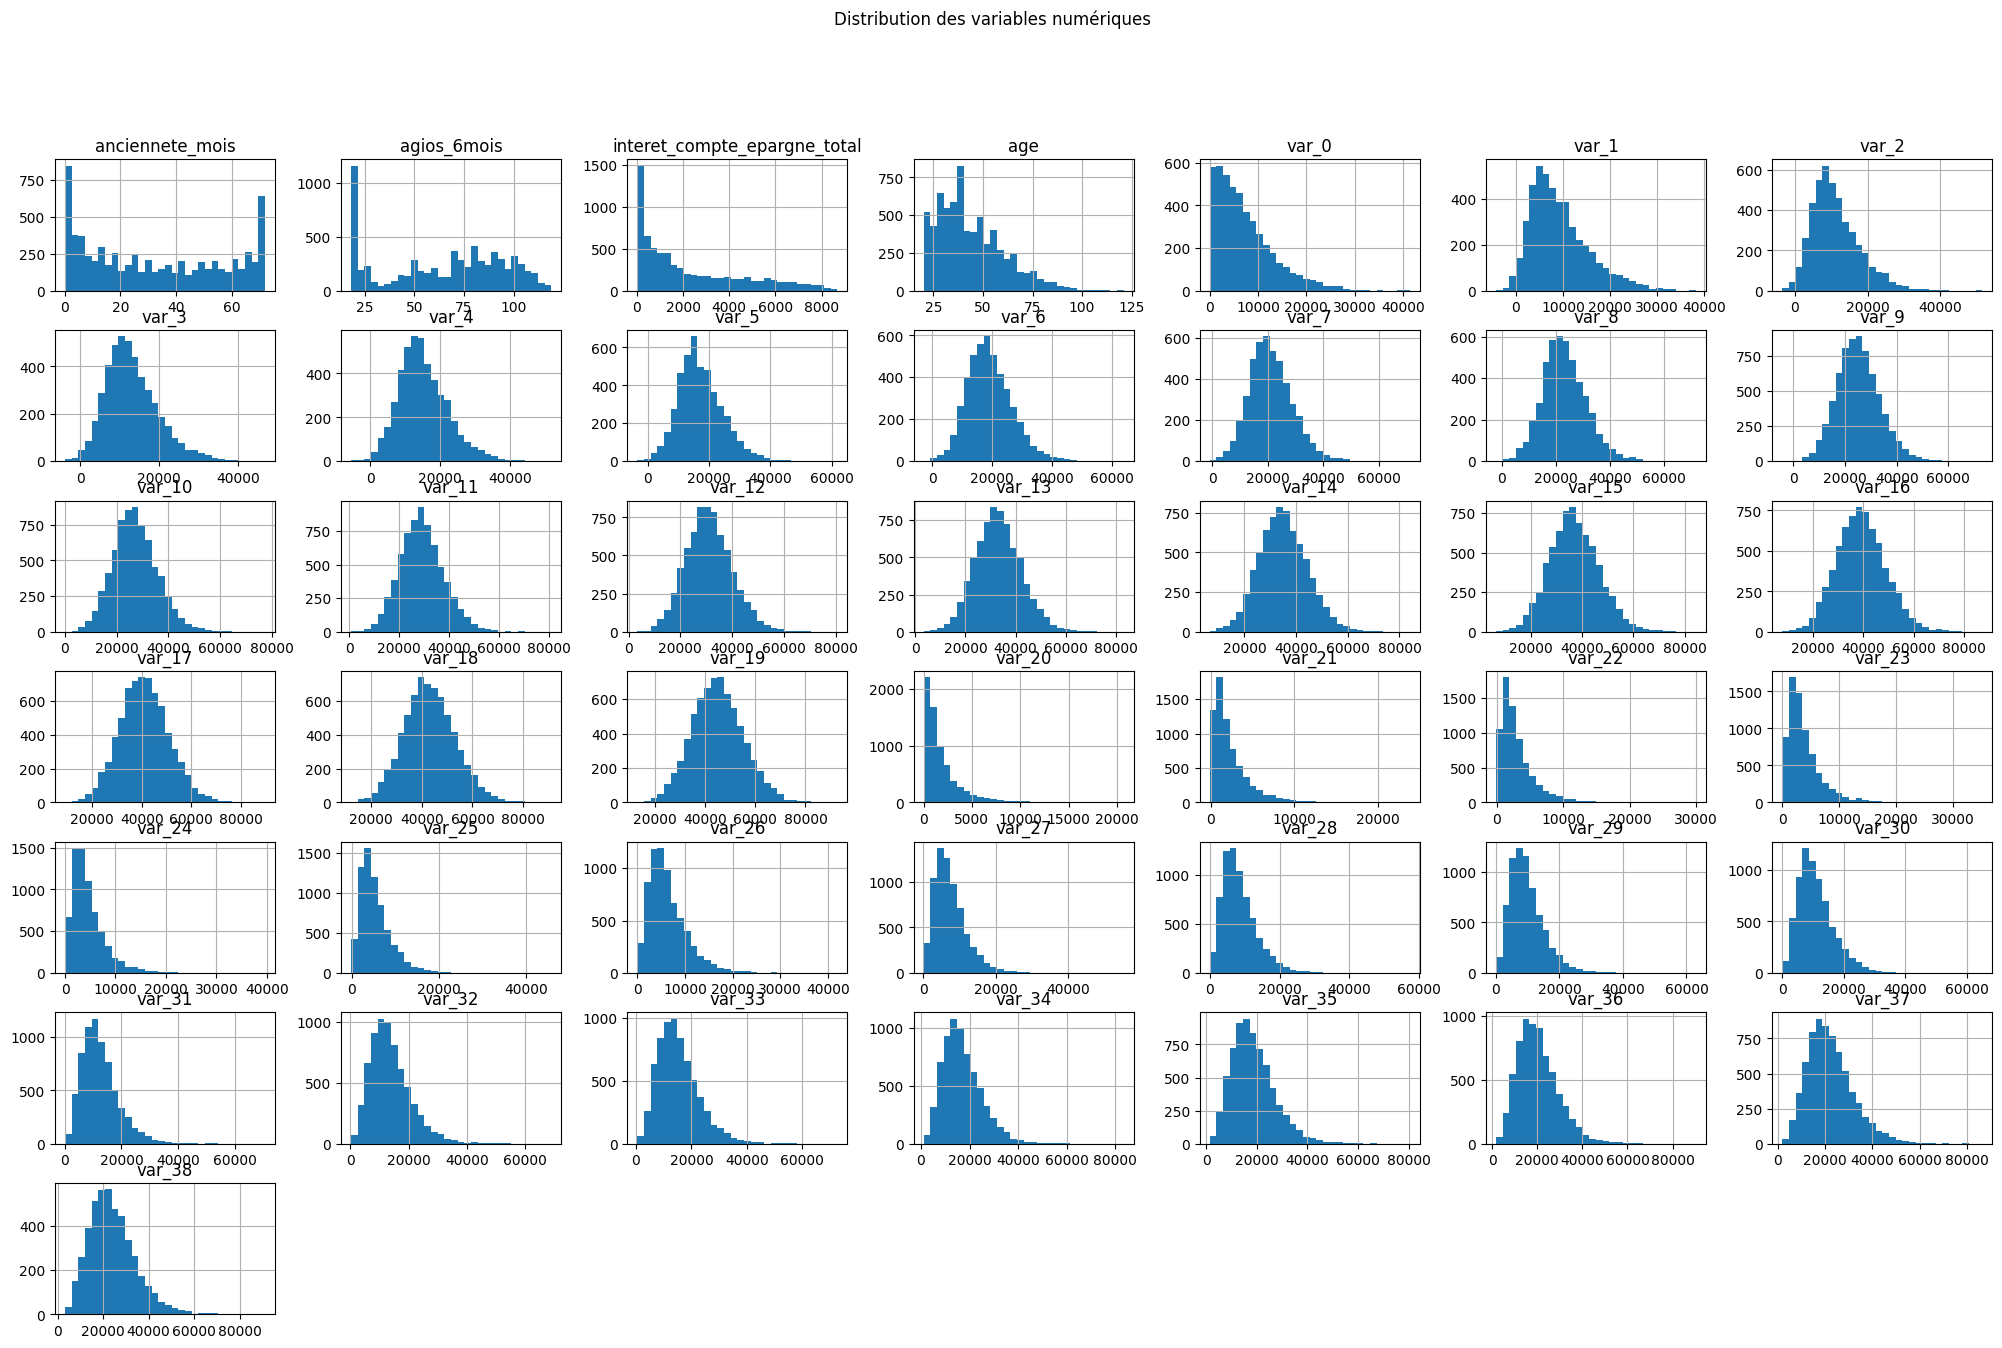

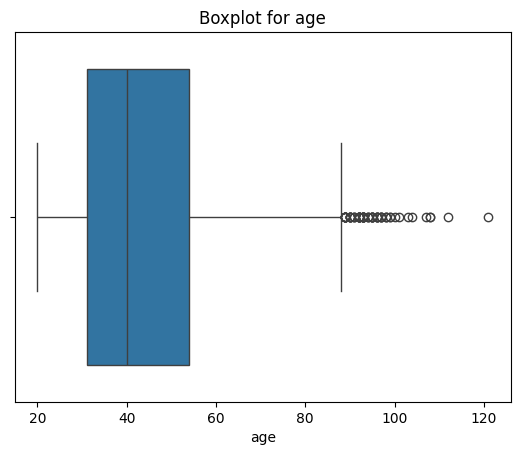

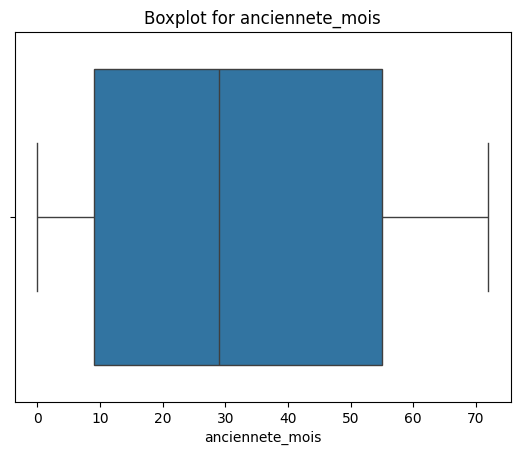

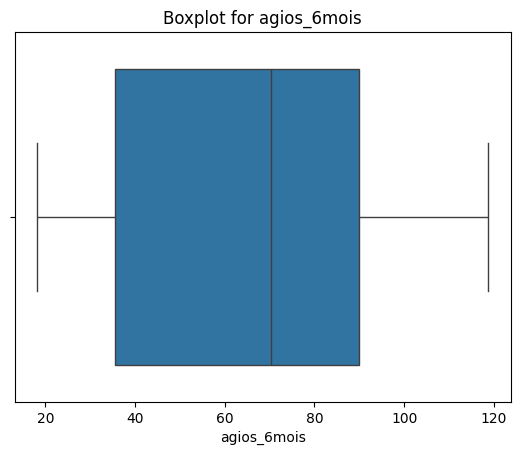

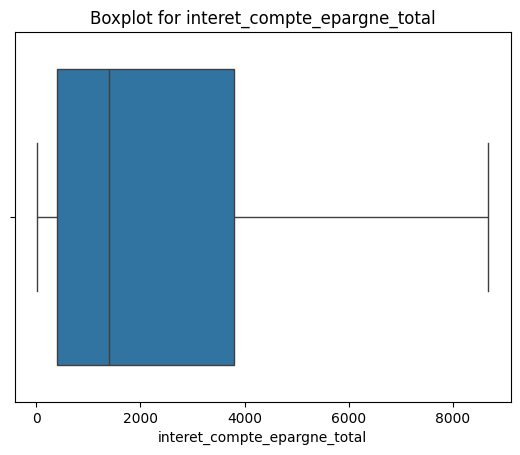

In [14]:
# Descriptive statistics
print(df_eda[numeric_cols].describe())


# Histograms
df_eda[numeric_cols].hist(bins=30, figsize=(25,15))

plt.suptitle("Distribution des variables numériques")
plt.show()

# Boxplots for selected important variables
for col in ['age', 'anciennete_mois', 'agios_6mois', 'interet_compte_epargne_total']:
    sns.boxplot(x=df_eda[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


## Results 

### 1. Anciennete_mois (Tenure in months)
- Histogram shows **two peaks**:  
  - One very high bar at the beginning (0–5 months, >800 clients) → many new clients.  
  - Another peak at the end (70–72 months, >600 clients) → many long-term clients.  
- Middle values are more spread out, forming a smaller peak.  
- Boxplot shows data mostly **centered**, no extreme outliers.  

**Conclusion:** Tenure is **bimodal**, with many new and very old clients, most data is within middle range (6–69 months).

---

### 2. Agios_6mois (6-month fees)
- Histogram has **high bar at low values** (18–22, >1000 clients).  
- Boxplot shows data mostly **centered around median**, but distribution is **left-skewed** (more clients pay less than the median).  

**Conclusion:** Most clients pay low fees; a smaller number pay higher fees. Skewed distribution, no extreme outliers.

---

#### 3. Interet_compte_epargne_total (Savings account interest)
- Histogram has **very high bar at low values** (0–400, >1750 clients).  
- Boxplot shows data **mostly above median**, with a long tail to the right.  
- Distribution is **right-skewed**, with some clients having very high interest amounts.  

**Conclusion:** Majority of clients earn low interest; few clients have high interest, creating a skewed distribution.  

---

#### 4. Age
- Histogram shows **peak around 37–40 (~1000 clients)**, another peak 20–37 (~800 clients).  
- After 40, frequency decreases steadily.  
- Boxplot shows **outliers after 83** and some extreme ages around 120.  

**Conclusion:** Most clients are between **20–55 years old**, with few very old (>80) clients. Data is mostly around the median.

---

#### 5. Other Numeric Variables (var_0 → var_n)

- `var_0` to `var_19` show **triangular distributions**: values increase to a peak in the middle, then decrease. Most data is concentrated around the center.  

- `var_20` to `var_38` onwards show **right-skewed distributions**: high peak at low values, decreasing frequency towards higher values, forming a long tail.  




### 8.4.Categorical vs Target (churn)

churn        non        oui
genre                      
F      72.980094  27.019906
H      73.963990  26.036010


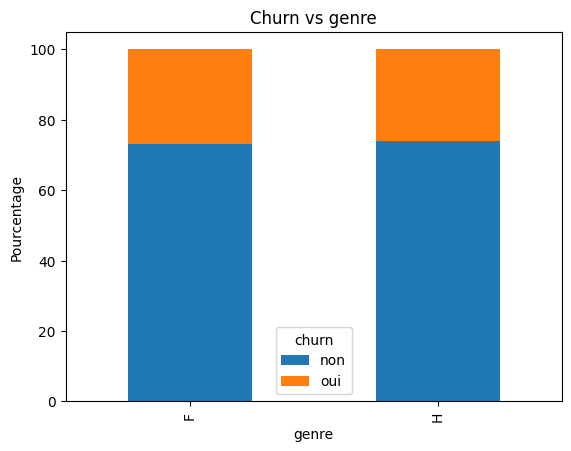

churn        non        oui
type                       
perso  88.626907  11.373093
pro    57.353716  42.646284


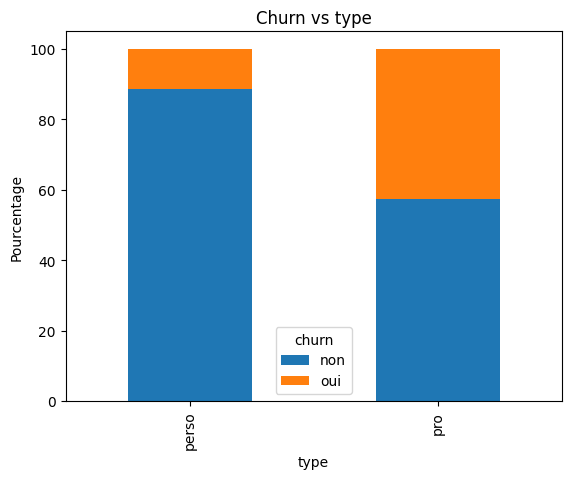

churn                 non         oui
segment_client                       
A1              82.889201   17.110799
A2               0.000000  100.000000
A3               0.000000  100.000000
A4              80.930233   19.069767
B1              83.259912   16.740088
B2              82.916667   17.083333
B3               0.000000  100.000000
B4               0.000000  100.000000
C1              82.485876   17.514124
C2              81.874040   18.125960
C3              83.385580   16.614420
C4              81.777778   18.222222
D1              80.872011   19.127989
D2               0.000000  100.000000
D3               0.000000  100.000000


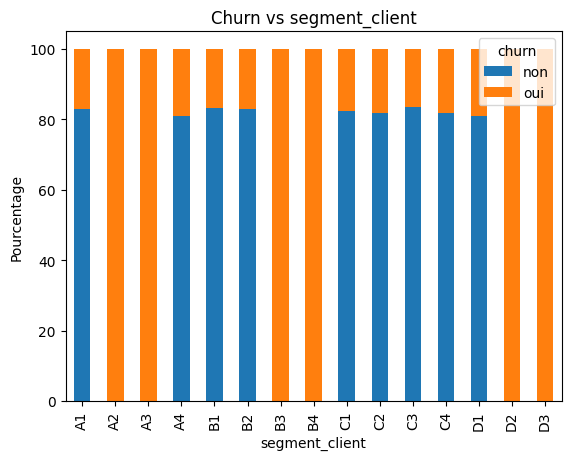

churn             non        oui
branche                         
CENTRE      74.158249  25.841751
NORD-EST    75.752644  24.247356
NORD-OUEST  64.167585  35.832415
OUTRE-MER   74.246129  25.753871
SUD-EST     75.374376  24.625624
SUD-OUEST   74.849268  25.150732


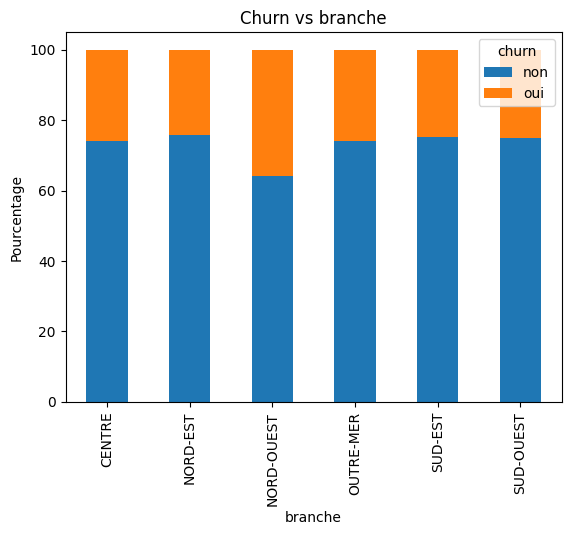

churn                    non        oui
espace_client_web                      
0.0                76.480746  23.519254
1.0                58.222222  41.777778


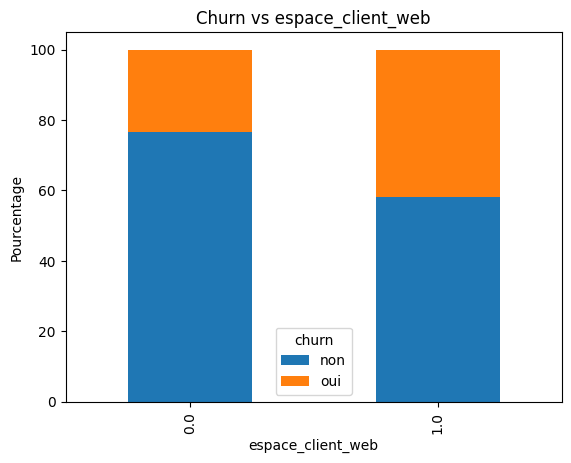

churn                non        oui
assurance_vie                      
non            66.964785  33.035215
oui            80.203959  19.796041


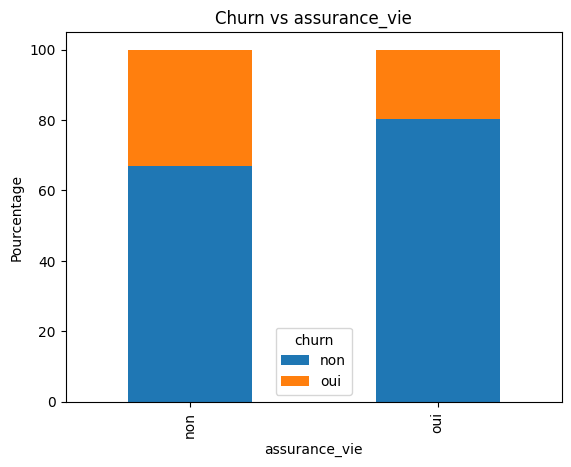

churn                    non        oui
banque_principale                      
non                68.768026  31.231974
oui                84.421867  15.578133


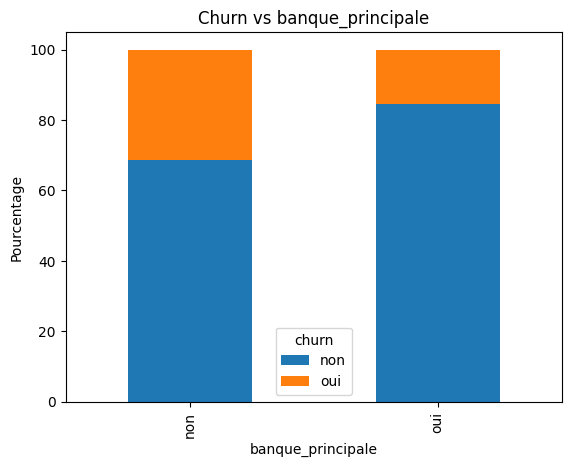

churn                 non        oui
compte_epargne                      
non             75.149701  24.850299
oui             73.321555  26.678445


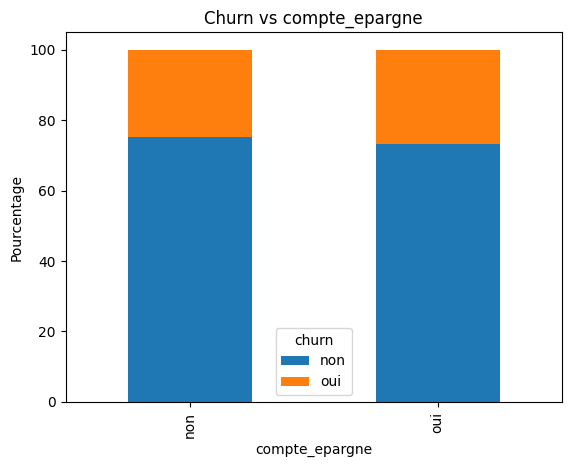

churn                non        oui
credit_autres                      
bail           74.925373  25.074627
consommation   71.296296  28.703704
permanent      74.834835  25.165165


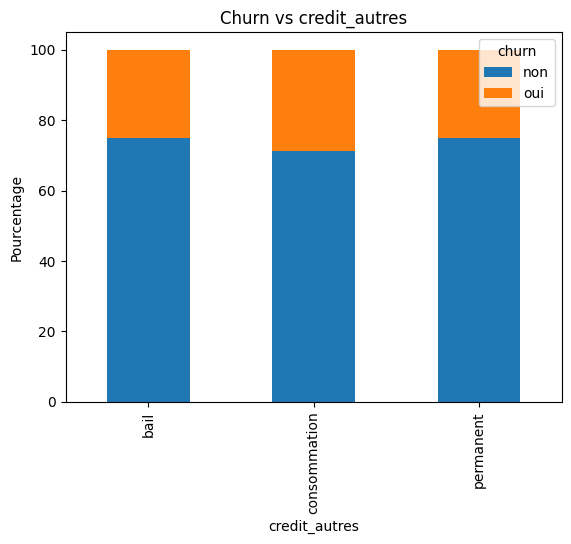

churn                   non        oui
cartes_bancaires                      
basic             81.052632  18.947368
medium            57.972928  42.027072
premium           92.746810   7.253190


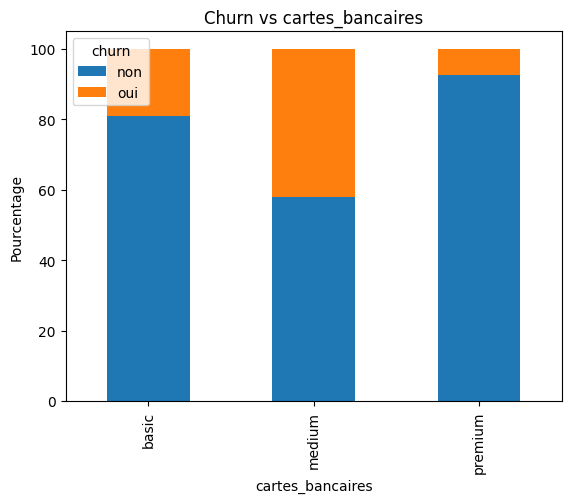

churn                 non        oui
compte_courant                      
non             58.440421  41.559579
oui             85.562847  14.437153


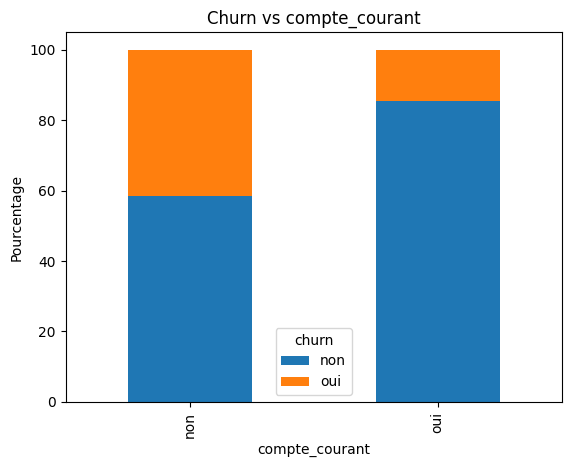

churn               non        oui
compte_joint                      
non           59.894285  40.105715
oui           78.386288  21.613712


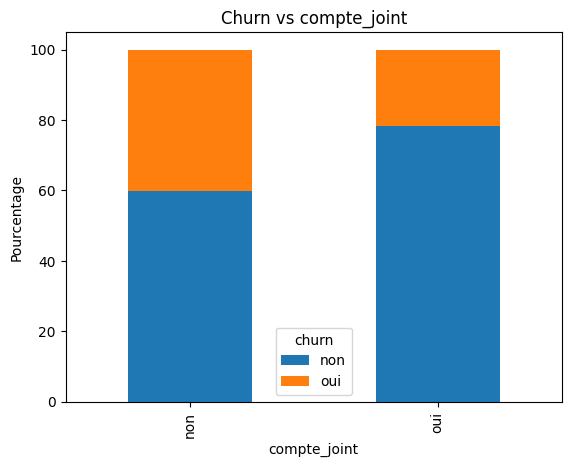

churn        non        oui
PEA                        
non    60.876730  39.123270
oui    77.240219  22.759781


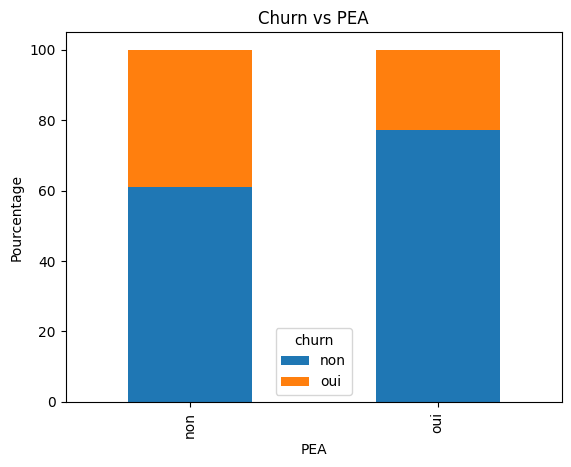

churn                 non        oui
assurance_auto                      
non             58.171664  41.828336
oui             84.865135  15.134865


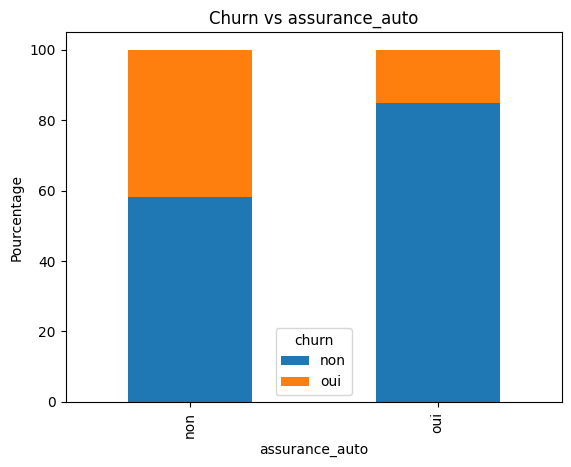

churn                       non        oui
assurance_habitation                      
non                   66.497093  33.502907
oui                   70.082894  29.917106


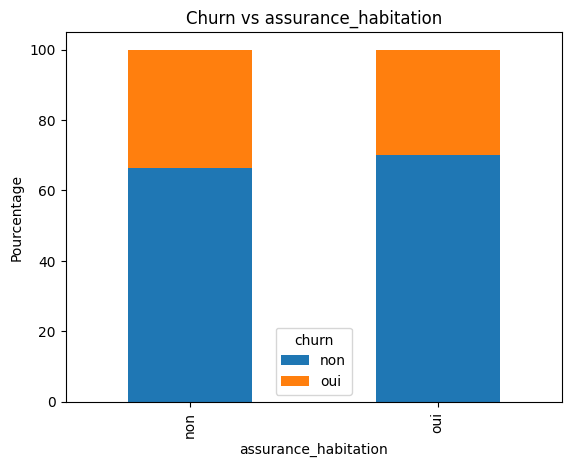

churn              non        oui
credit_immo                      
non          66.445916  33.554084
oui          70.018622  29.981378


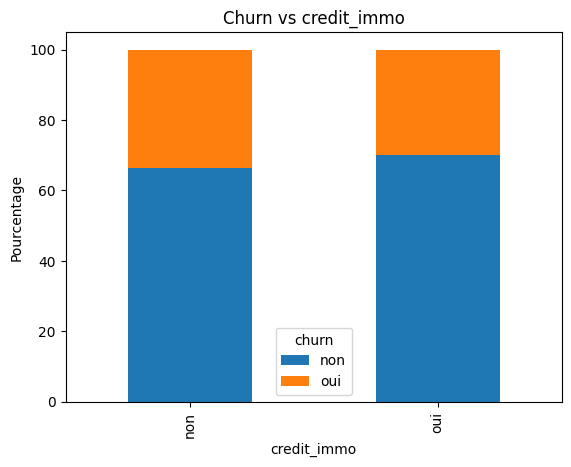

churn                non        oui
compte_titres                      
non            83.765542  16.234458
oui            66.520254  33.479746


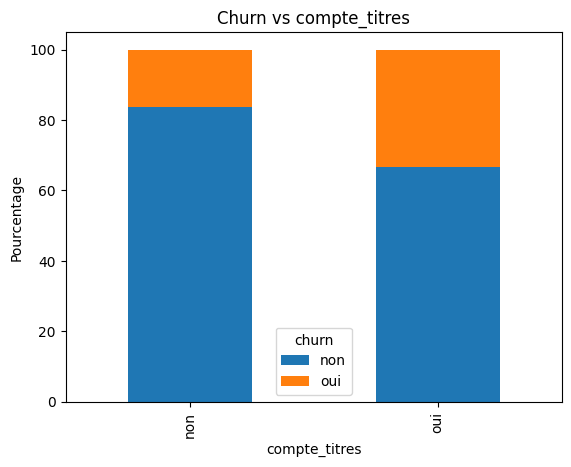

churn                  non        oui
methode_contact                      
courrier         80.856423  19.143577
mail             54.643629  45.356371
sms              84.781145  15.218855
telephone        83.145322  16.854678


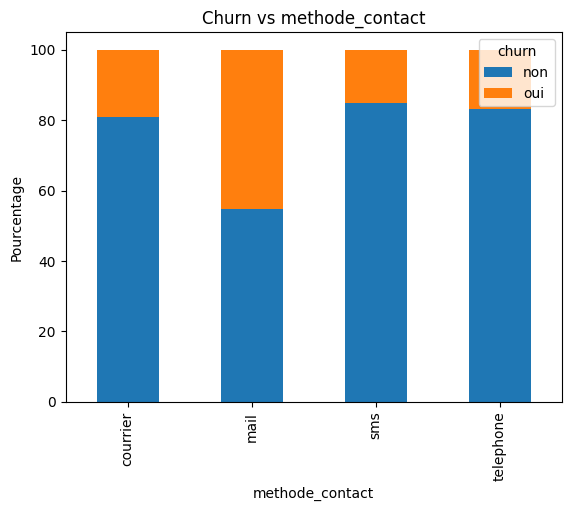

In [15]:
for col in categorical_cols:
    if col != 'churn':
        ct = pd.crosstab(df_eda[col], df_eda['churn'], normalize='index') * 100
        print(ct)
        ct.plot(kind='bar', stacked=True)
        plt.title(f"Churn vs {col}")
        plt.ylabel('Pourcentage')
        plt.show()


### Results 

### Variables with almost **no effect** on churn 
- **Genre**: H = 26%, F = 27% → almost no difference  
- **Compte_epargne**: non = 25%, oui = 27% → almost no difference  
- **Credit_autres**: bail = 25%, permanent = 25%, consommation = 29% → small effect  
- **Assurance_habitation**: non = 34%, oui = 30% → minor effect  
- **Credit_immo**: non = 33%, oui = 30% → minor effect  

### Variables with **strong effect** on churn 
- **Type**: perso = 11%, pro = 43% → pro has much higher churn  
- **Segment_client**: Most segments 16–19%, some small segments 100% → small segments extreme, major segments low churn  
- **Branche**: NORD-OUEST = 36%, others 24–26% → NORD-OUEST higher risk  
- **Espace_client_web**: 0 = 24%, 1 = 42% → web users churn more  
- **Assurance_vie**: non = 33%, oui = 20% → insurance reduces churn  
- **Banque_principale**: non = 31%, oui = 16% → using main bank services reduces churn  
- **Cartes_bancaires**: basic = 19%, medium = 42%, premium = 7% → medium cards high churn, premium low  
- **Compte_courant**: non = 42%, oui = 14% → having current account reduces churn  
- **Compte_joint**: non = 40%, oui = 22% → joint account reduces churn  
- **PEA**: non = 39%, oui = 23% → investment account reduces churn  
- **Assurance_auto**: non = 42%, oui = 15% → auto insurance reduces churn  
- **Compte_titres**: non = 16%, oui = 33% → investment account increases churn  
- **Methode_contact**: mail = 45%, courrier = 19%, sms = 15%, telephone = 17% → mail contact increases churn  

---

### General Observations
- Features that **reduce churn**: assurance_vie, banque_principale, compte_courant, compte_joint, PEA, assurance_auto  
- Features that **increase churn**: type=pro, medium card, compte_titres, mail contact  
- Gender has **no effect**  
- Small segments can appear extreme due to low sample size


### 8.4.Numeric vs Target

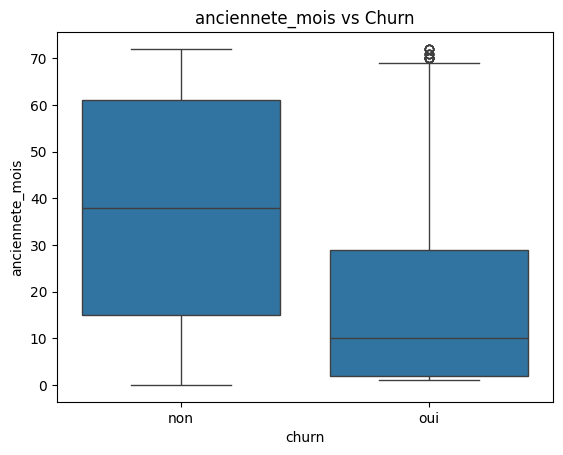

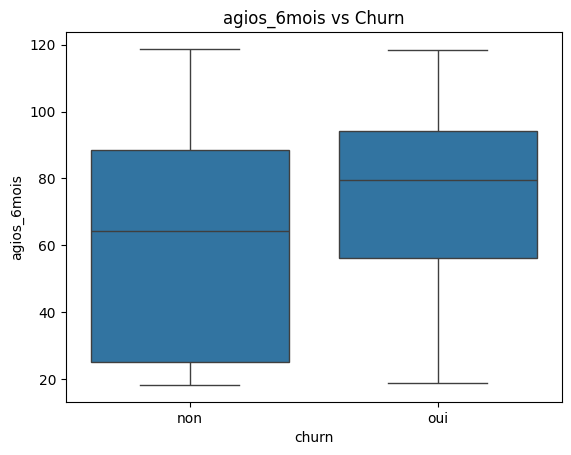

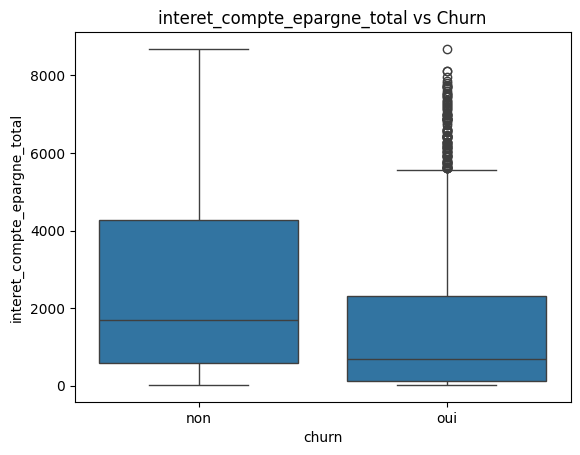

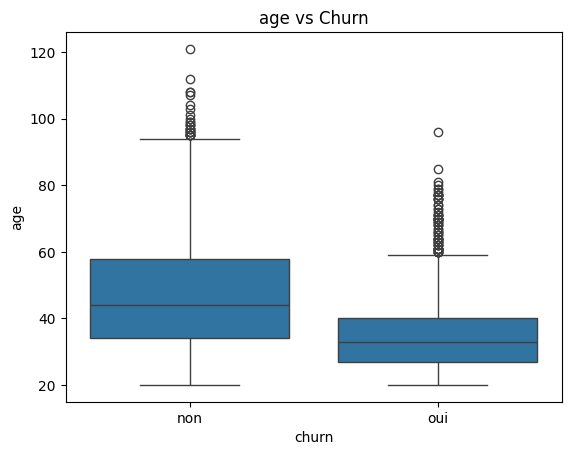

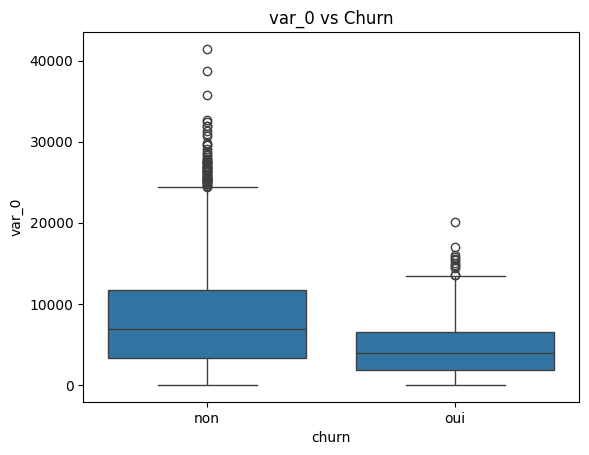

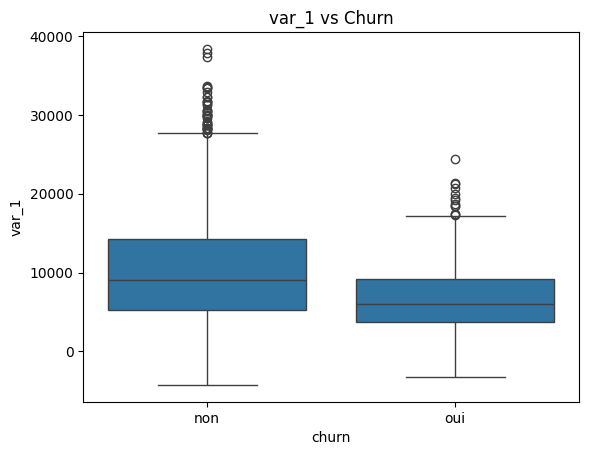

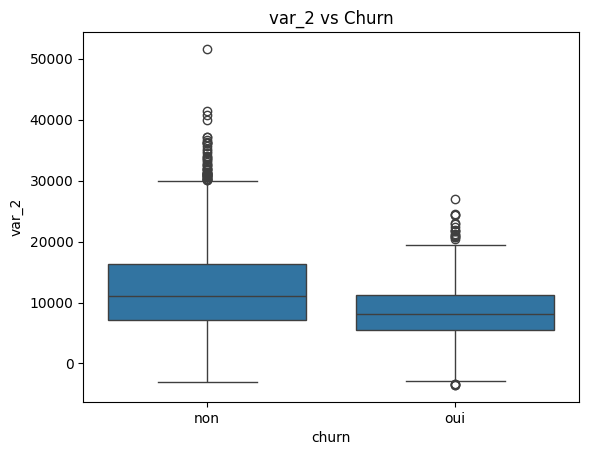

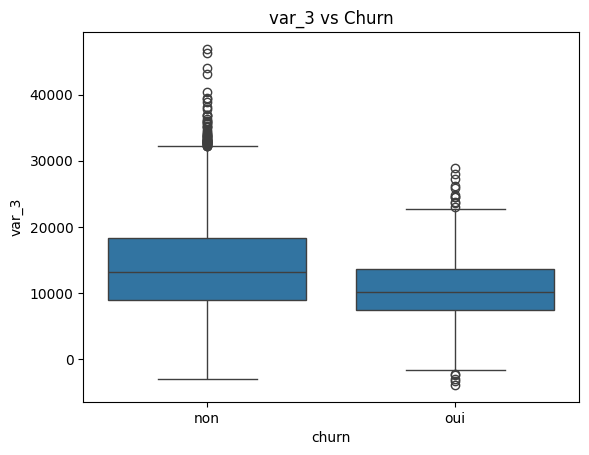

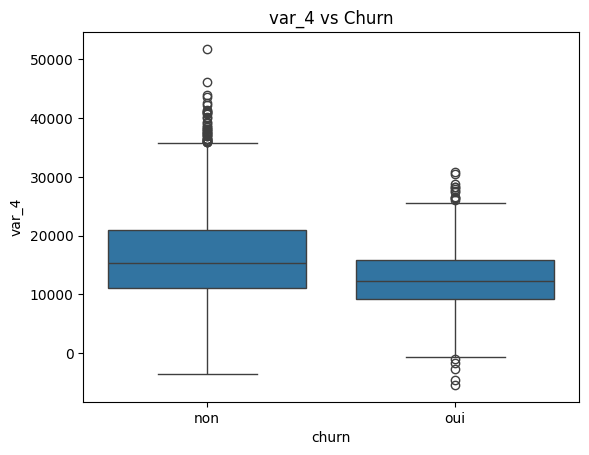

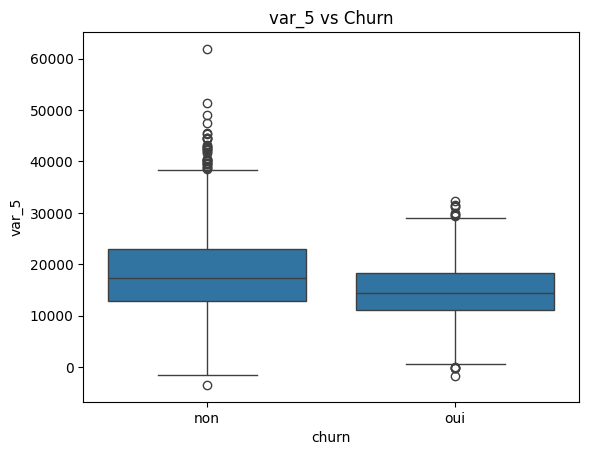

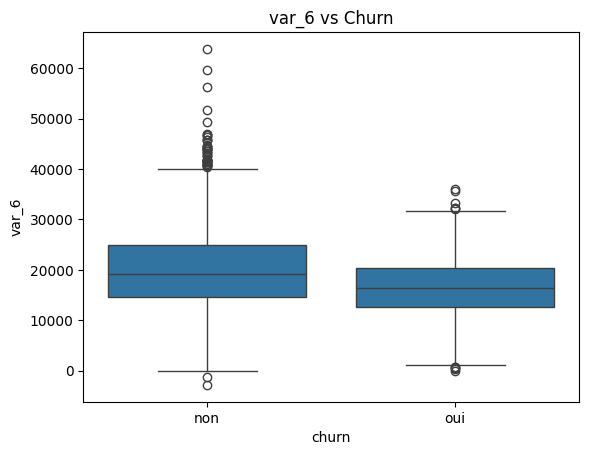

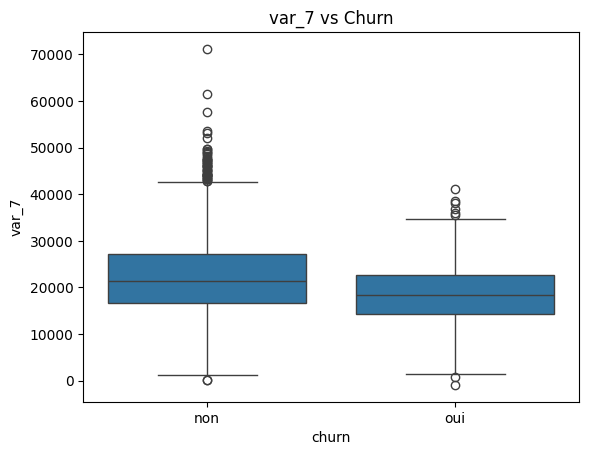

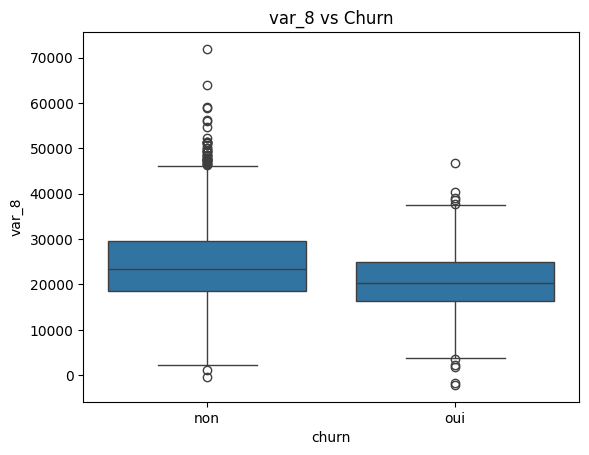

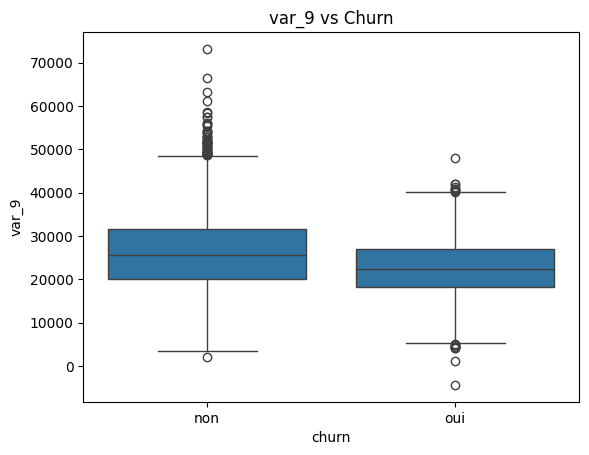

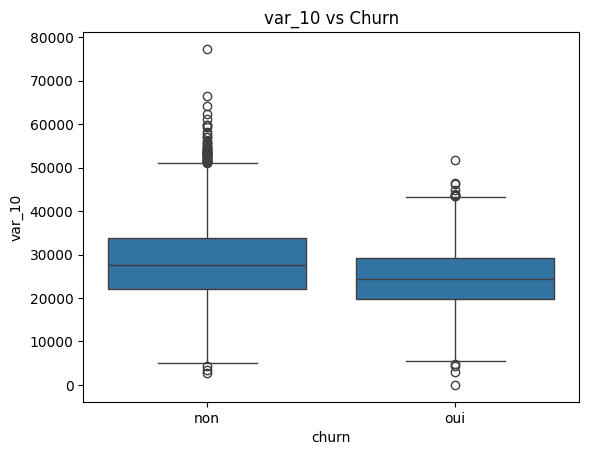

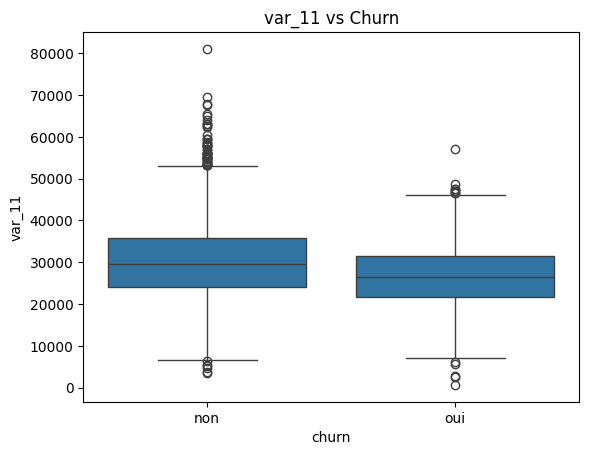

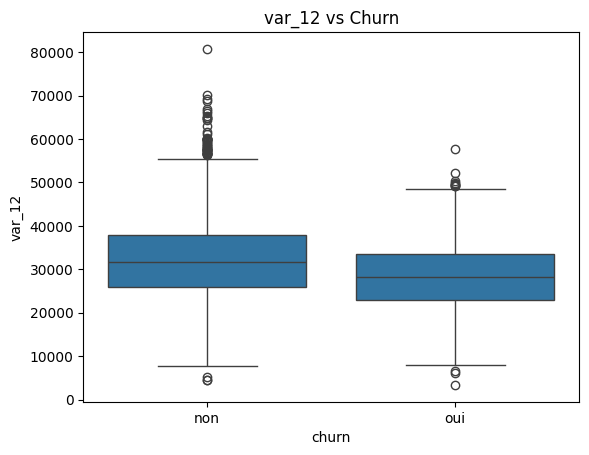

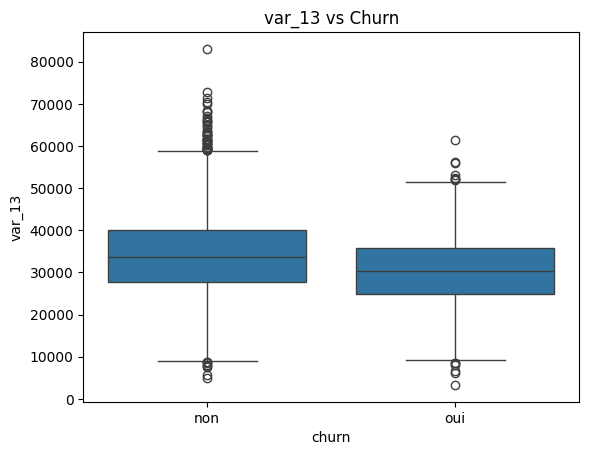

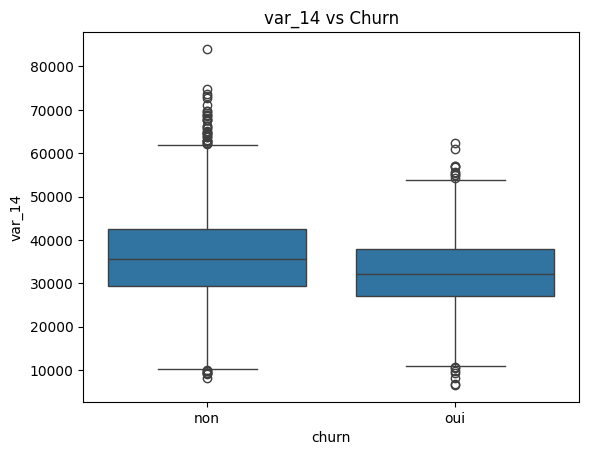

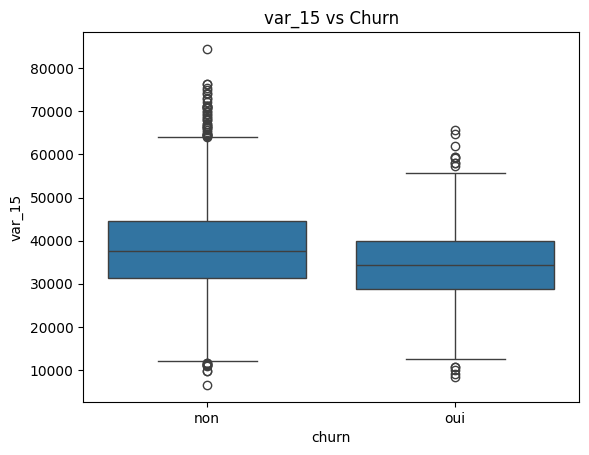

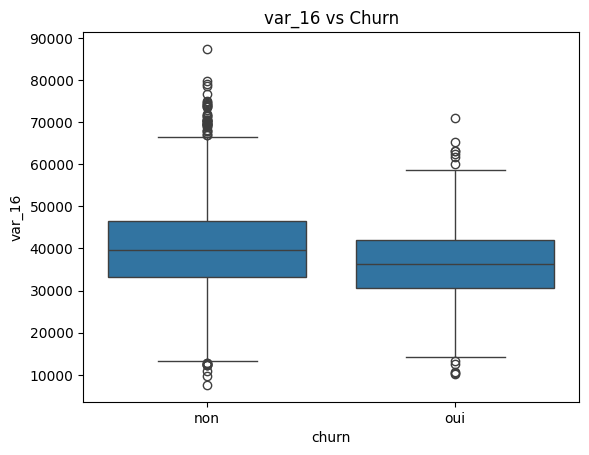

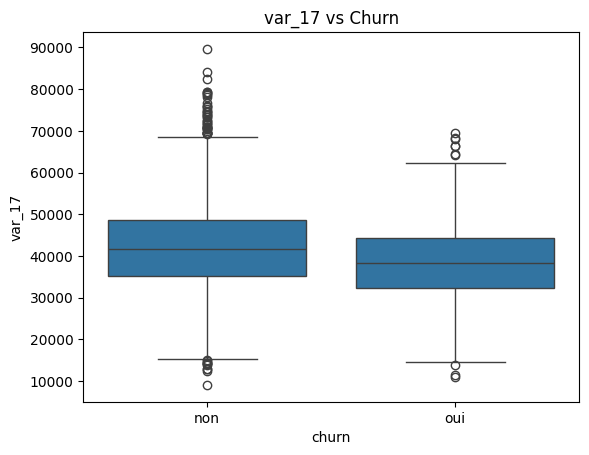

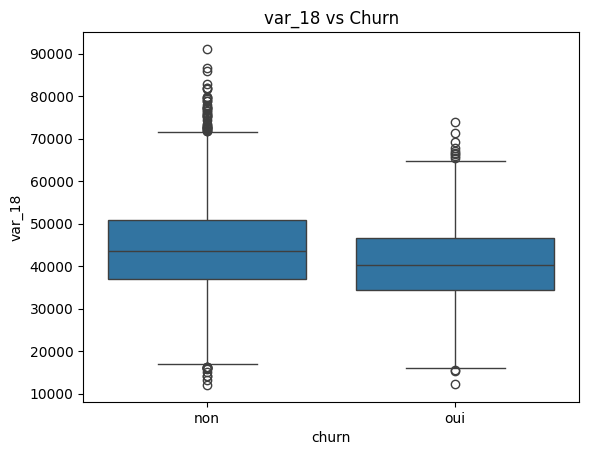

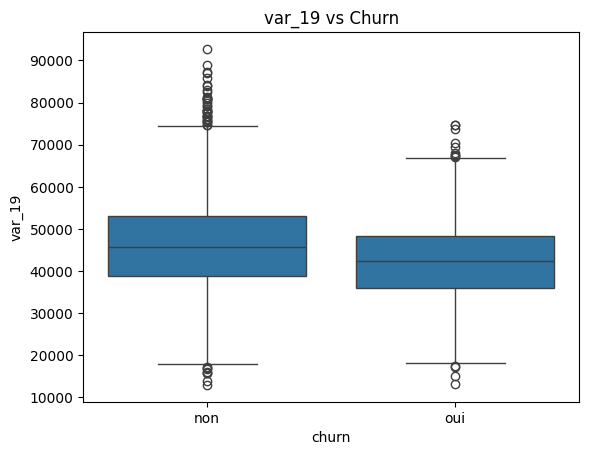

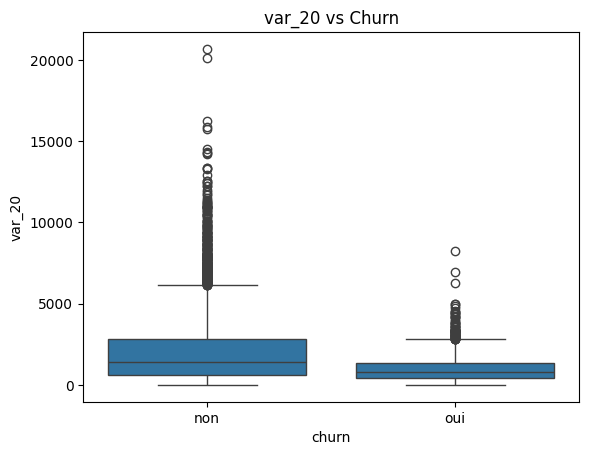

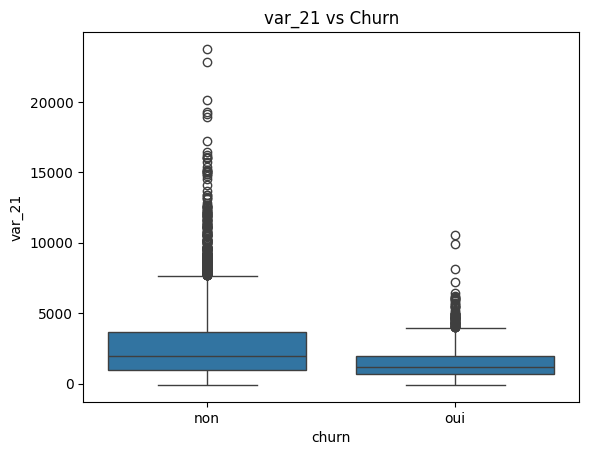

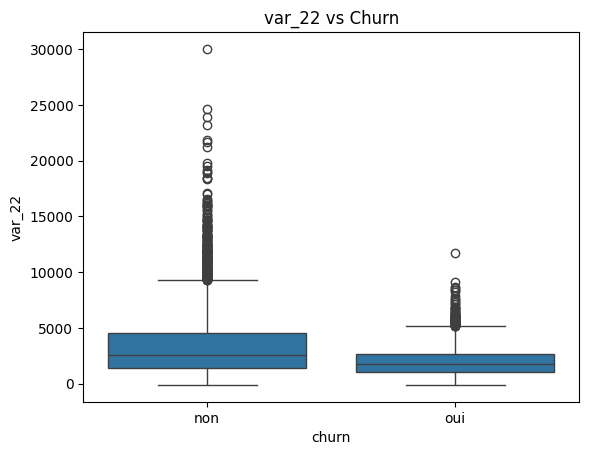

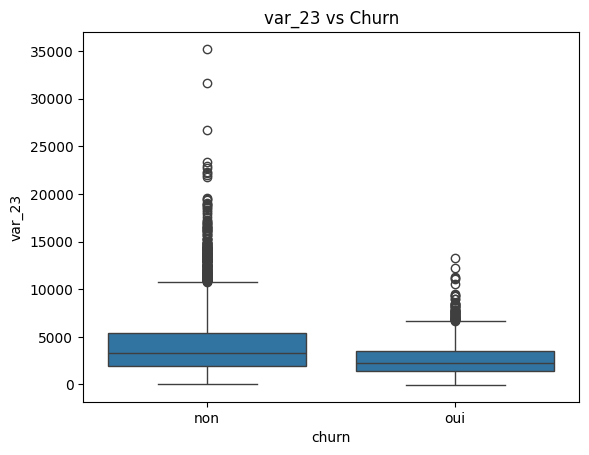

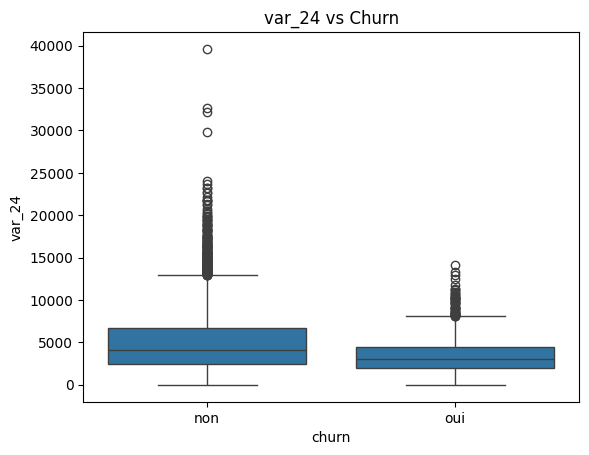

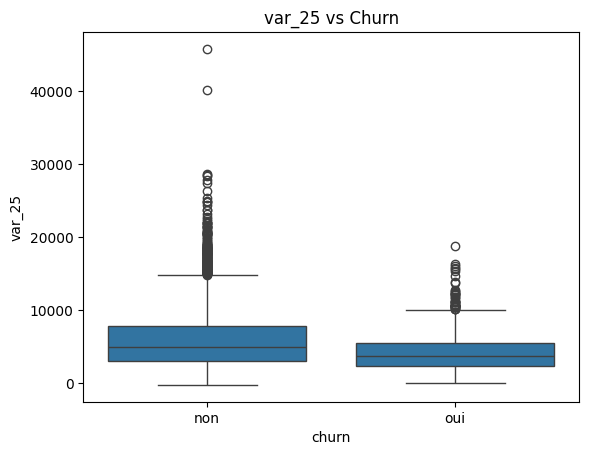

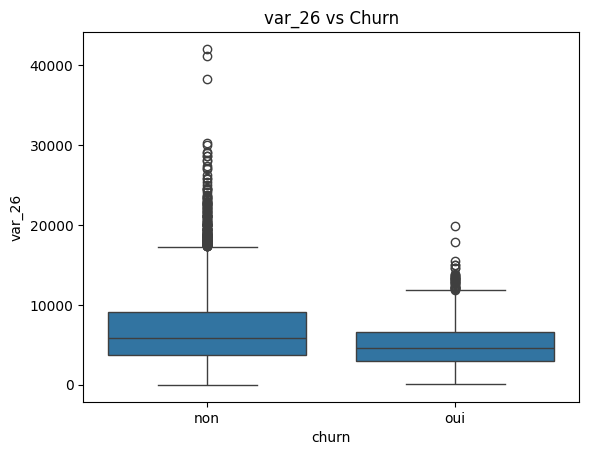

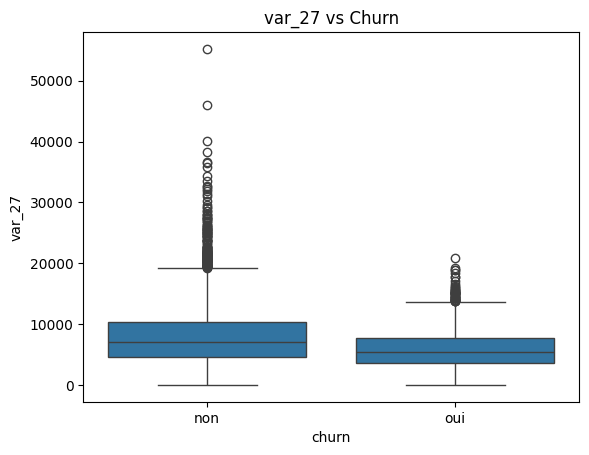

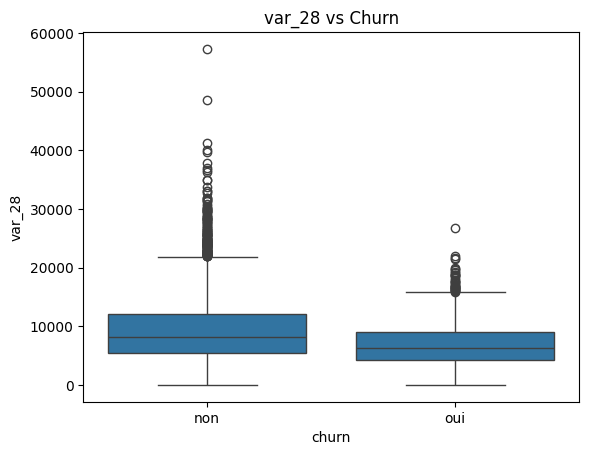

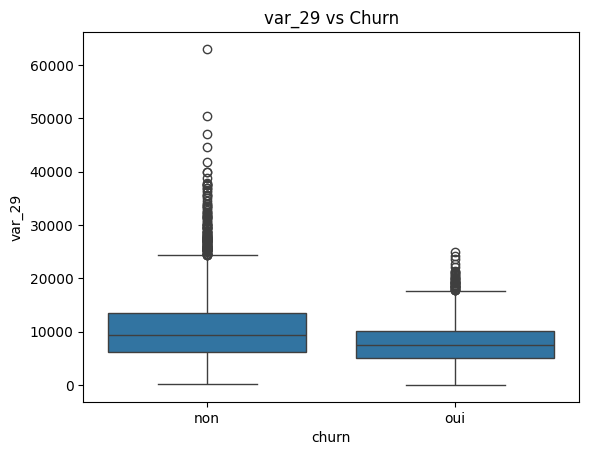

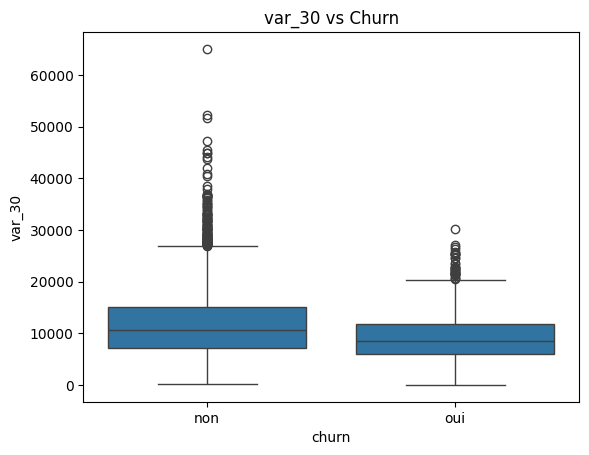

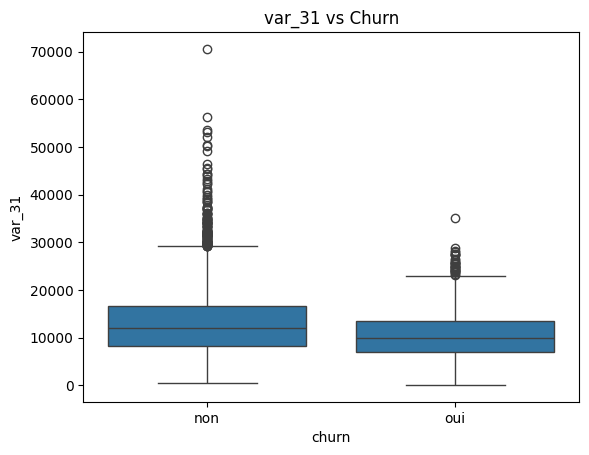

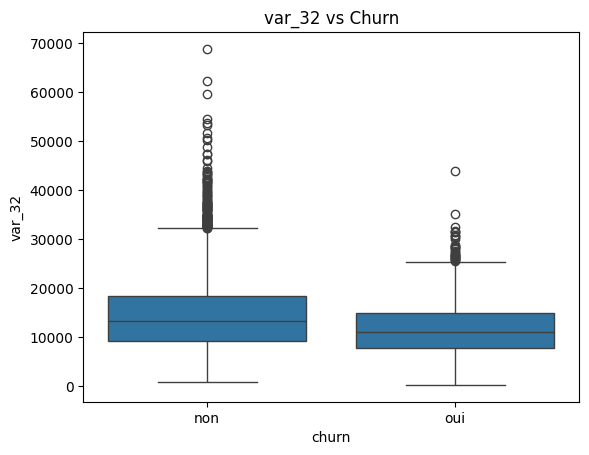

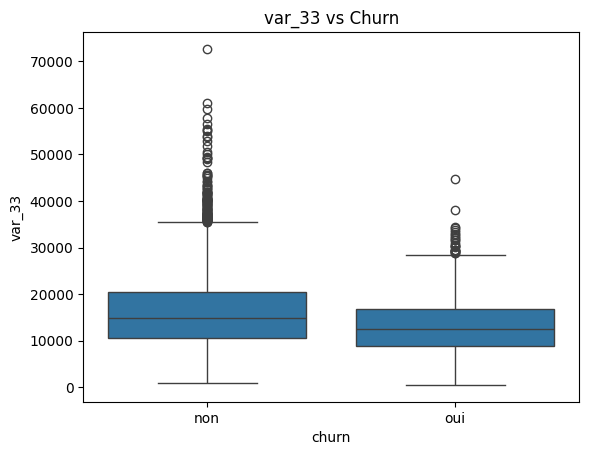

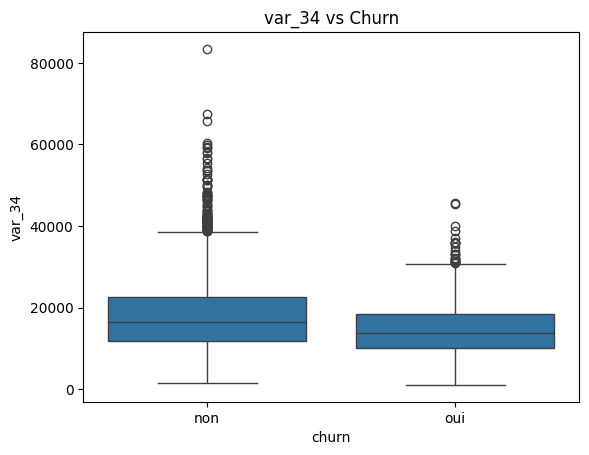

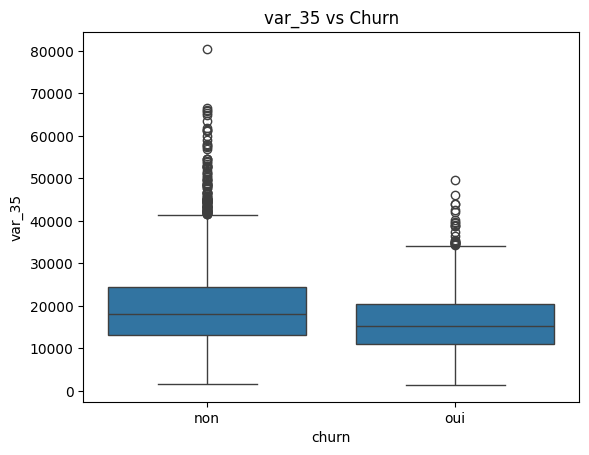

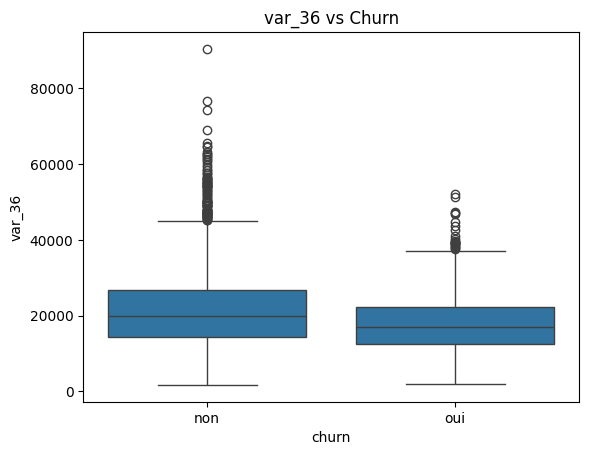

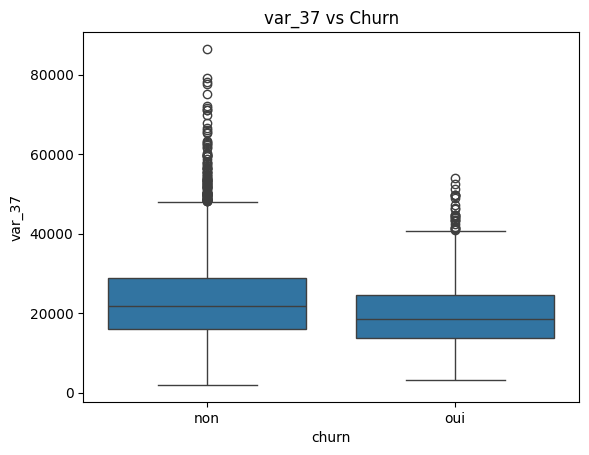

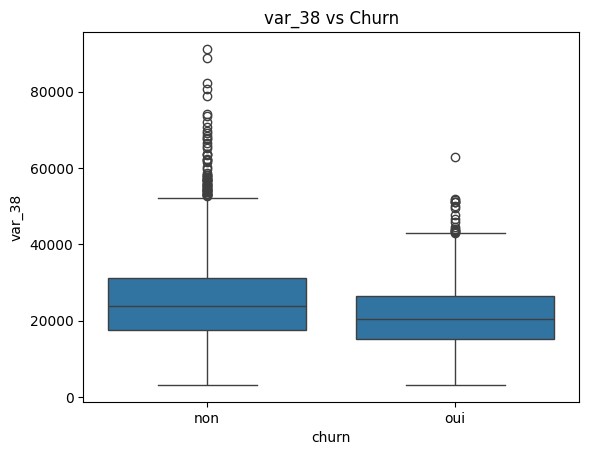

In [28]:
for col in numeric_cols :
    sns.boxplot(x='churn', y=col, data=df_eda)
    plt.title(f"{col} vs Churn")
    plt.show()


### Results :
####

#### 1. Age vs Churn
- Churned customers are **significantly younger** than retained customers.
- Age distribution of churned customers is **more concentrated**, while retained customers show a **wider spread**.
- Outliers above 100 years may indicate **data quality issues**.

**Conclusion:**  
==> Younger customers (25–40 years old) are more likely to churn.  
==> Age is a **relevant predictor** of churn.

---

#### 2️. anciennete_mois vs Churn
- Churned customers have a **much lower median tenure** (~10 months) compared to retained customers (~38 months).
- Most churn occurs in the **early stages** of the customer lifecycle.
- Long-tenured customers rarely churn.

**Conclusion:**  
==> Churn is primarily an **early-stage problem**.  
==> Tenure is a **strong predictor** of churn.

---

#### 3️.interet_compte_epargne_total vs Churn
- Churned customers have **lower savings balances**.
- Retained customers show **higher and more diverse balances**.
- High-balance customers occasionally churn, but these are exceptions.

**Conclusion:**  
==> Customers with **low savings balances** are more likely to churn.  
==> Higher financial engagement is linked to **better retention**.

---

#### 4️.agios_6mois vs Churn
- Churned customers have **higher median overdraft fees**.
- High fees concentrate among churned customers, while retained customers include many low-fee users.


**Conclusion:**  
==> **High overdraft fees** are strongly associated with churn.  
==> agios_6mois act as a **friction factor**, increasing likelihood of churn.

---

#### 5. var_0 → var_19 (e.g., var_2)**

- Median difference between `non` (retained) and `oui` (churned) exists, but not very large (e.g., 11,000 vs 8,000).  
- Spread of retained customers (`non`) is wider, with higher outliers.  
- Churned customers (`oui`) are more concentrated in the lower-middle range.  
- **Key insight:** The main difference is in extreme/high values. Customers with very high values rarely churn. Otherwise, most of the population overlaps.  

#### 6. var_20 → var_38 (e.g., var_21)**

- Median difference is smaller (2,000 vs 1,000), but retained customers (`non`) have very extreme outliers, creating a long tail.  
- Churned customers (`oui`) mostly occupy the lower range, with few outliers.  
- **Key insight:** The distribution is skewed: most churned customers are low-value, while retained customers include both low- and extremely high-value users.



---

####  Overall Summary
- Age, tenure, savings balance, and overdraft fees **clearly separate churned from retained customers**.
- These variables are **strong candidates** for churn prediction and business action.


### Correlation Analysis for Numeric Variables

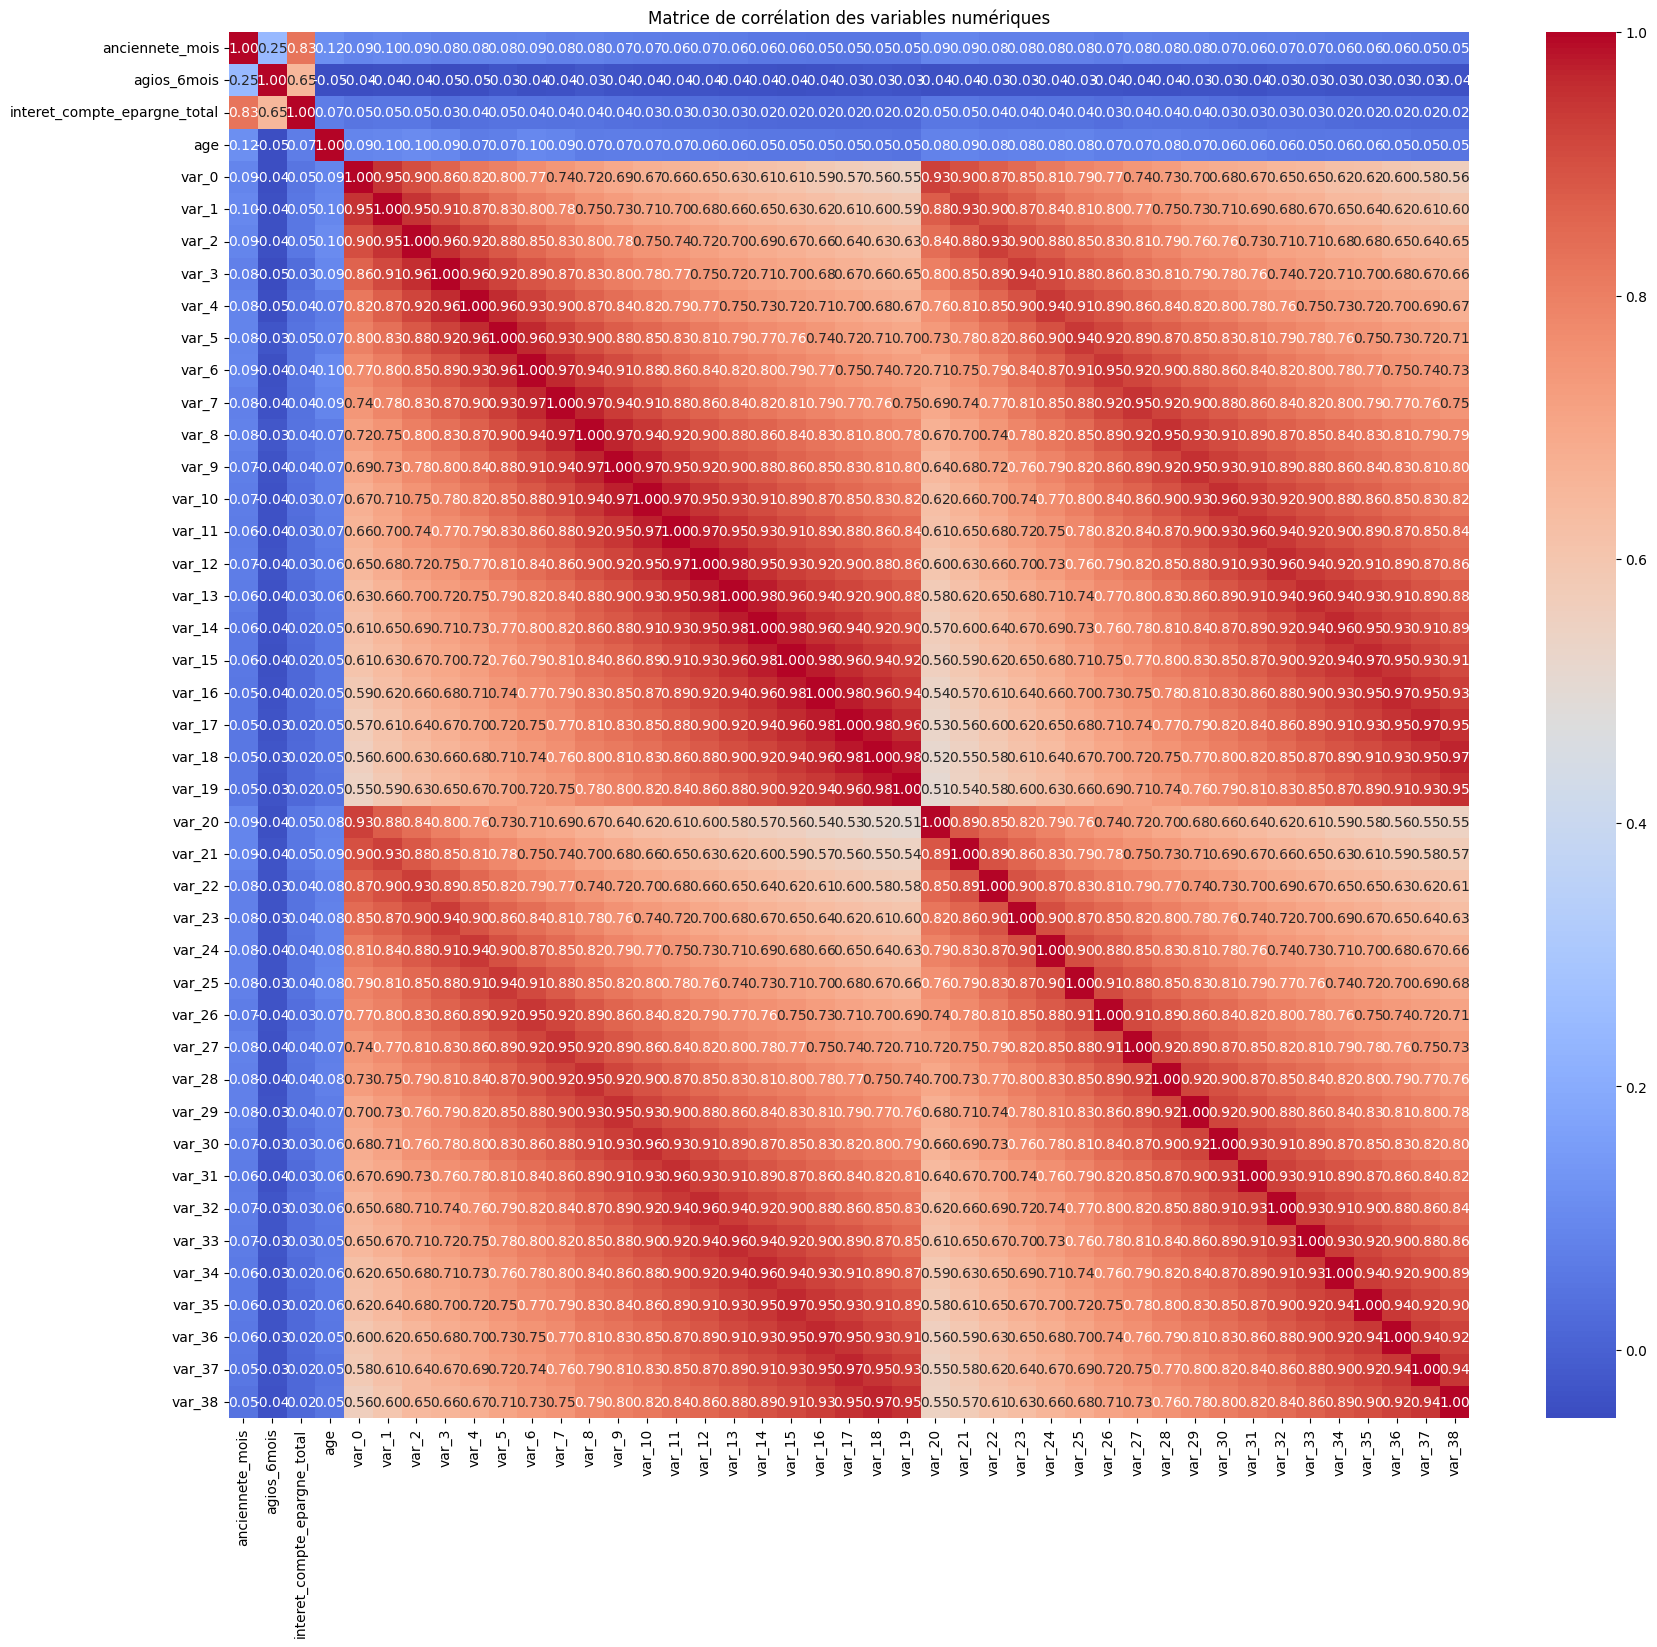

In [44]:
plt.figure(figsize=(20,18))
sns.heatmap(df_eda[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation des variables numériques")
plt.show()

#### **. Key Observations**

- **Strong internal correlations within variable groups:**
  - `var_0` → `var_32` all have correlation **> 0.5**
    - These variables tend to move together, indicating they may represent similar patterns.
  - `var_0-7` & `var_20-27` → correlation **> 0.72**
    - These two clusters are highly correlated → possibly redundant features.
  - `var_8-19` & `var_28-38` → correlation **> 0.72**
    - Another cluster of closely related variables.

- **Cross-feature correlations:**
  - `anciennete_mois` & `interet_compte_epargne_total` → **0.85**
    - Strong correlation: customers with longer tenure tend to have higher savings balances.
  - `agios_6mois` & `interet_compte_epargne_total` → **0.65**
    - Moderate correlation: customers with higher savings also pay higher overdraft fees, likely due to more active account usage.

# Phase 02: Prétraitement des données 

## 1.Gestion des types de données

### Étape 0 : replacing the nan in df with the actual Nan
#### 
here we detected that the null values are represented as 'nan' which are detected as string

In [84]:
df.replace(to_replace=r'(?i)^nan$', value=np.nan, regex=True, inplace=True)


### Étape 1 : Converting Categorical Variables
#### 
Categorical variables were converted to the category data type to improve readability, memory efficiency, and to prepare the dataset for subsequent encoding steps.

In [168]:
# List of categorical variables
categorical_cols = [
    'genre', 'type', 'segment_client', 'branche', 'churn',
    'espace_client_web', 'assurance_vie', 'banque_principale',
    'compte_epargne', 'credit_autres', 'cartes_bancaires',
    'compte_courant', 'compte_joint', 'PEA', 'assurance_auto',
    'assurance_habitation', 'credit_immo', 'compte_titres',
    'methode_contact'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')


### Step 2 : Converting Age variable to numerique

In [94]:
# Convert age to numeric 
df['age'] = pd.to_numeric(df['age'], errors='raise')

### Step 3 : Cleaning Numeric Columns and Removing Symbols

#### 
 **Objective**
- Some numeric variables are stored as object because they contain:
- Currency symbols (€, $)
- Textual values (unk, nan)
- Mixed numeric and non-numeric characters.
**The objective of this step is to remove non-numeric characters and convert these columns to float, while safely handling invalid values.**


#### Generic Cleaning Function

      Cleans numeric columns stored as object by:
    - Removing currency symbols (€,$)
    - Removing commas used as thousands separators
    - Removing any remainin non-numeric characters
    - Converting the result to float
    - Invalid or non-parsable values are replaced with NaN

In [99]:
# List of numeric columns
numeric_cols_s = [
    'anciennete_mois', 'agios_6mois', 'interet_compte_epargne_total'
] + [f'var_{i}' for i in range(39)]

# Loop through numeric columns
for col in numeric_cols_s:
    # Convert to string, remove symbols, then convert to float
    df[col] = df[col].astype(str) \
                 .str.replace('€', '', regex=False) \
                 .str.replace('$', '', regex=False) \
                 .str.replace(',', '', regex=False) \
                 .str.replace(r'[^\d\.-]', '', regex=True) \
                 .replace('', np.nan) \
                 .astype(float)


### Conclusion – Data Type Management & Cleaning

In this step, we first replaced string 'nan' values with real NaN to ensure missing values are correctly recognized by pandas.
Next, all categorical columns were converted to the category data type for clarity and memory efficiency.
Finally, numeric columns were cleaned by removing currency symbols and non-numeric characters, then converted to float.
After this step, the dataset is properly typed, cleaned, and ready for outlier detection and missing value handling.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id_client                     7043 non-null   object  
 1   genre                         6915 non-null   category
 2   espace_client_web             6916 non-null   category
 3   assurance_vie                 6912 non-null   category
 4   banque_principale             6921 non-null   category
 5   anciennete_mois               6909 non-null   float64 
 6   compte_epargne                6894 non-null   category
 7   credit_autres                 6916 non-null   category
 8   cartes_bancaires              6893 non-null   category
 9   compte_courant                6896 non-null   category
 10  compte_joint                  6912 non-null   category
 11  PEA                           6897 non-null   category
 12  assurance_auto                6907 non-null   ca

## 2.Détection et traitement des valeurs aberrantes

In [100]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


anciennete_mois: 0 outliers
agios_6mois: 0 outliers
interet_compte_epargne_total: 0 outliers
age: 68 outliers
var_0: 204 outliers
var_1: 177 outliers
var_2: 155 outliers
var_3: 149 outliers
var_4: 128 outliers
var_5: 113 outliers
var_6: 98 outliers
var_7: 91 outliers
var_8: 91 outliers
var_9: 88 outliers
var_10: 81 outliers
var_11: 80 outliers
var_12: 70 outliers
var_13: 67 outliers
var_14: 71 outliers
var_15: 68 outliers
var_16: 73 outliers
var_17: 69 outliers
var_18: 65 outliers
var_19: 61 outliers
var_20: 472 outliers
var_21: 424 outliers
var_22: 376 outliers
var_23: 341 outliers
var_24: 311 outliers
var_25: 267 outliers
var_26: 228 outliers
var_27: 223 outliers
var_28: 216 outliers
var_29: 201 outliers
var_30: 196 outliers
var_31: 192 outliers
var_32: 179 outliers
var_33: 159 outliers
var_34: 130 outliers
var_35: 148 outliers
var_36: 134 outliers
var_37: 153 outliers
var_38: 140 outliers


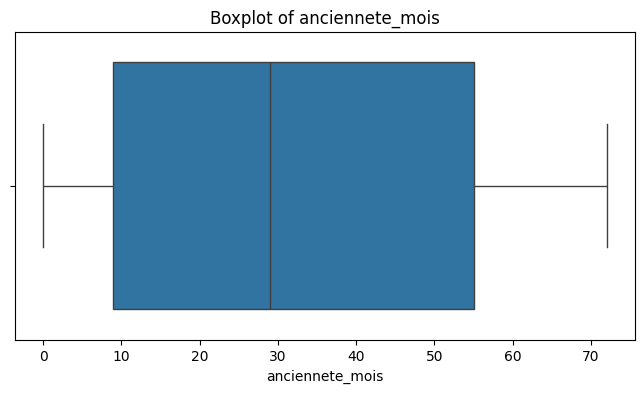

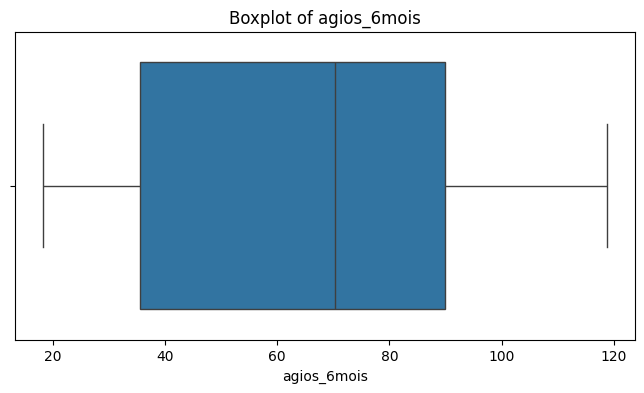

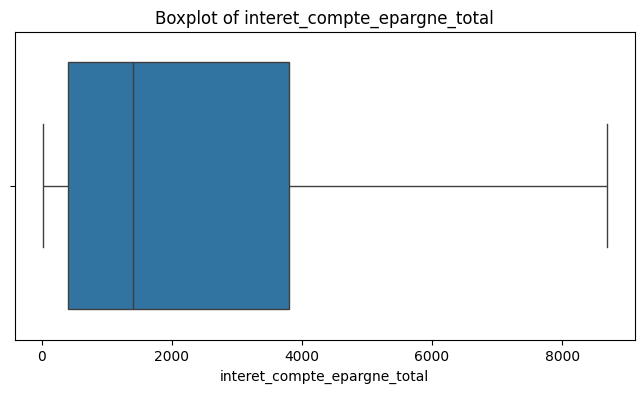

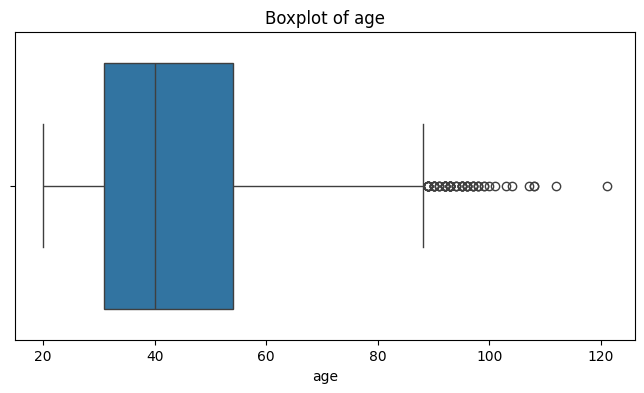

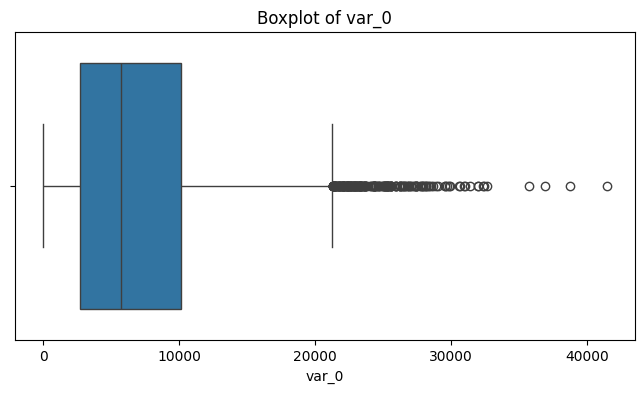

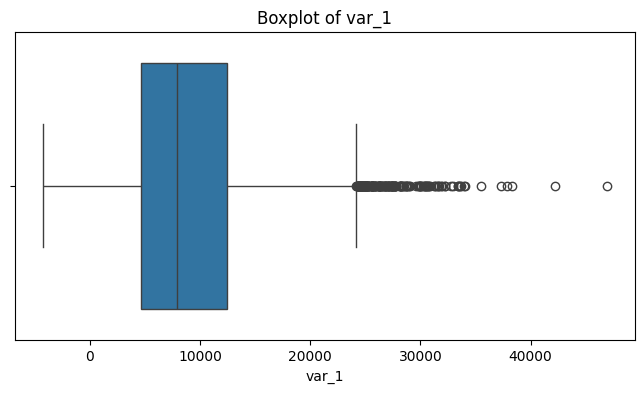

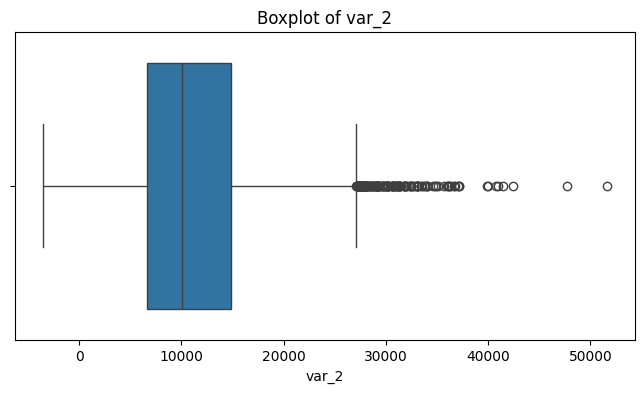

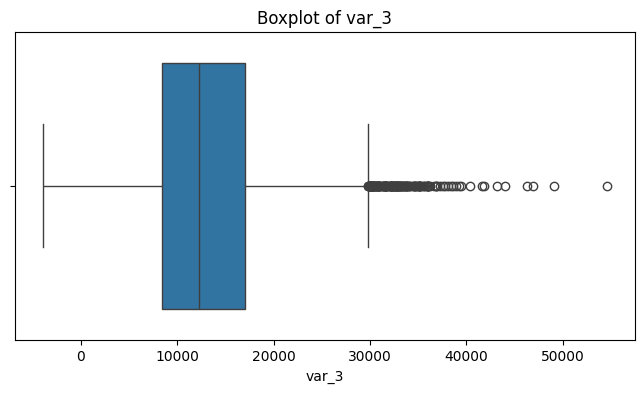

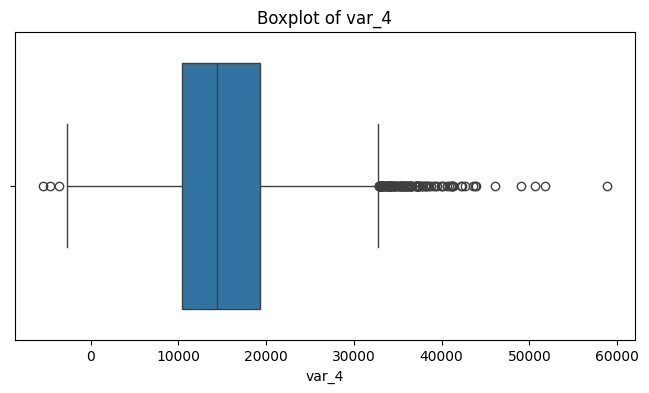

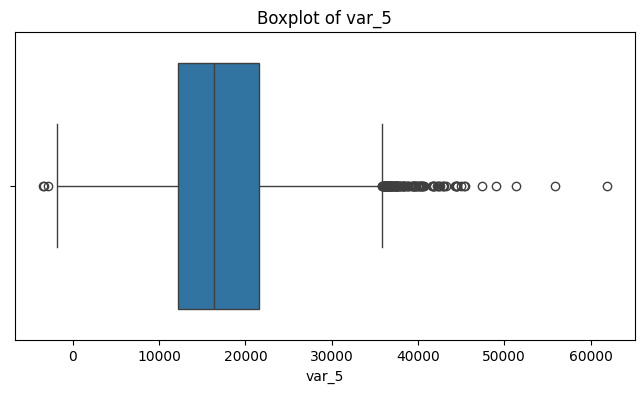

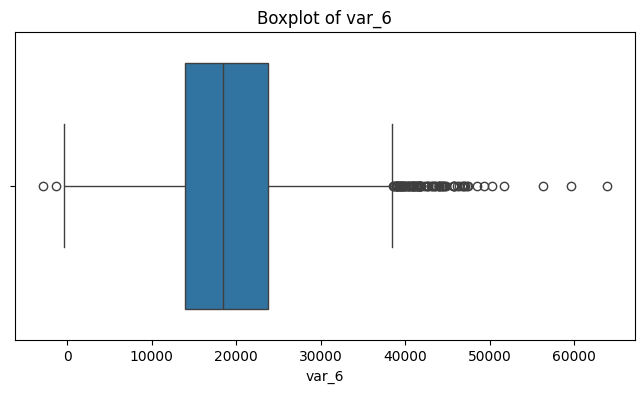

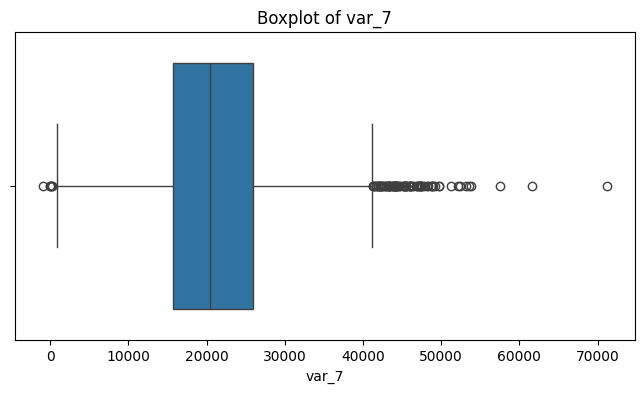

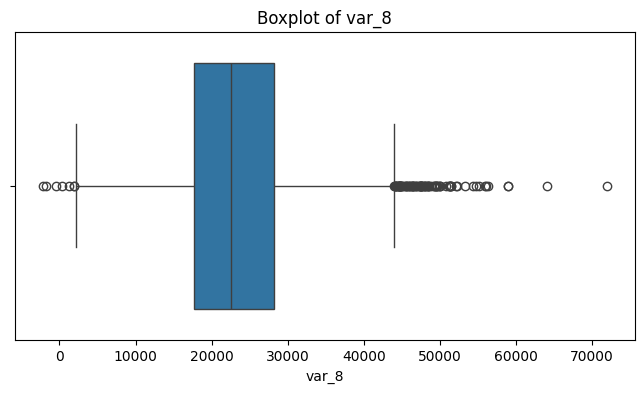

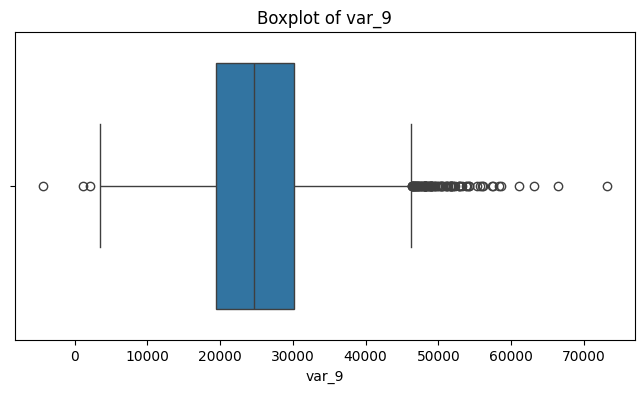

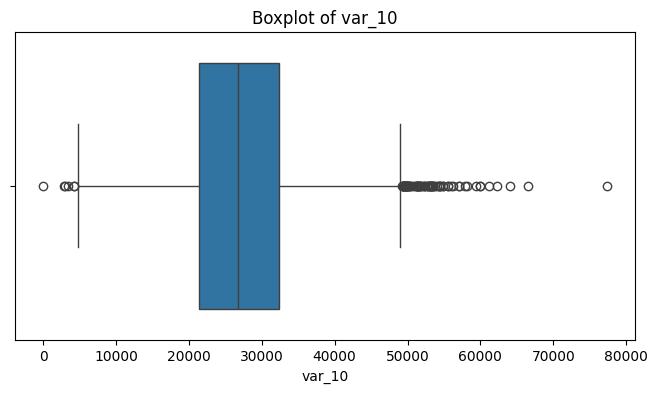

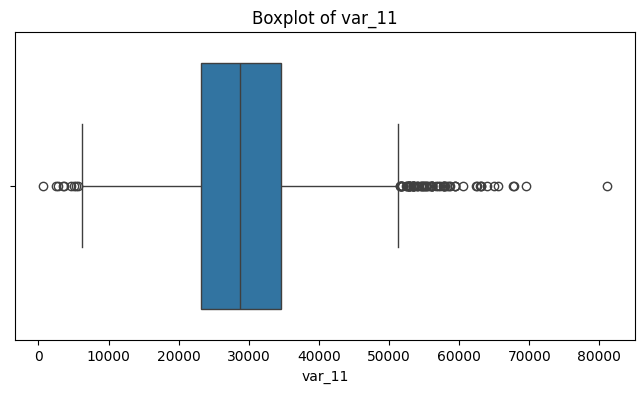

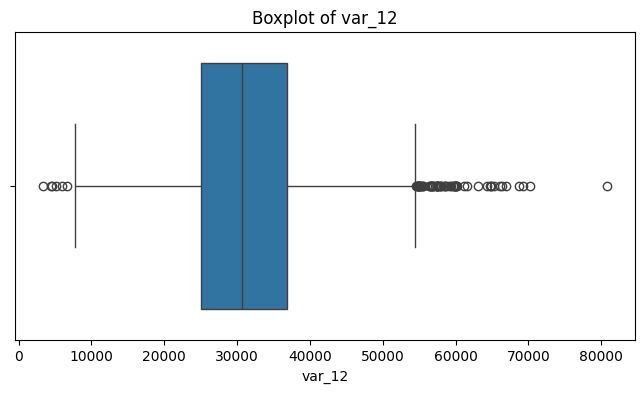

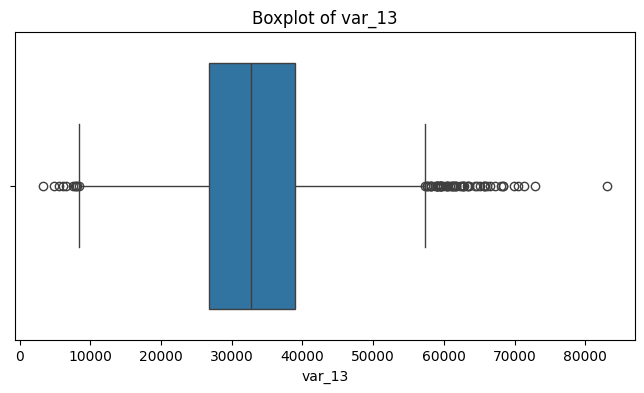

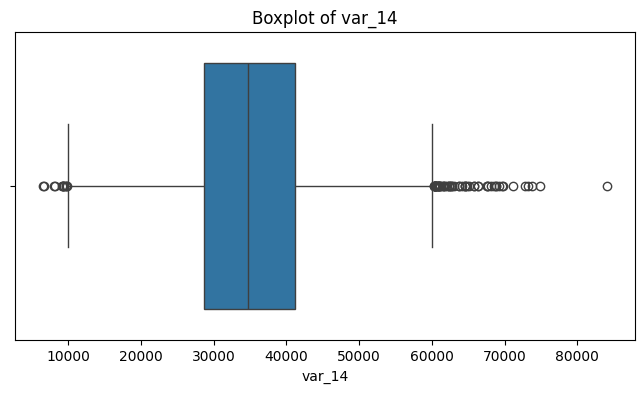

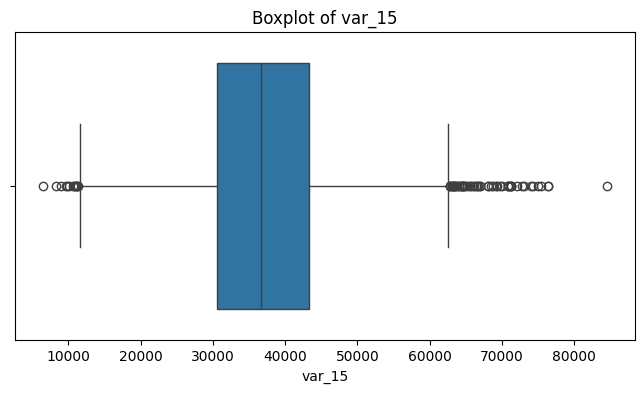

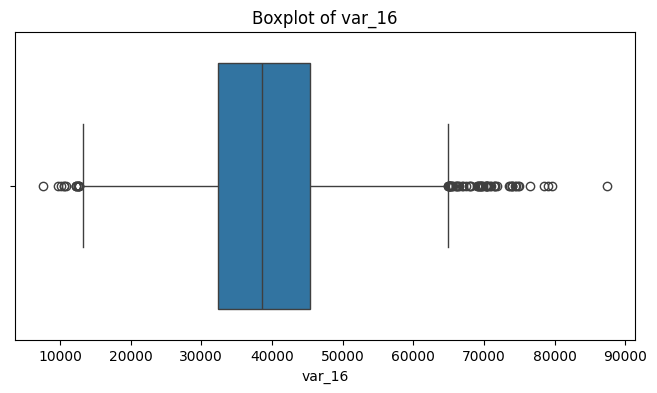

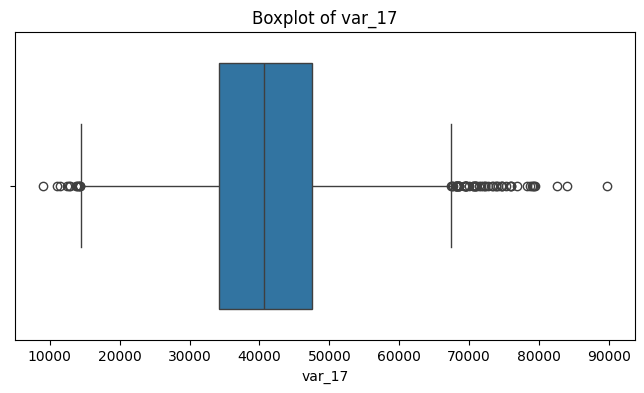

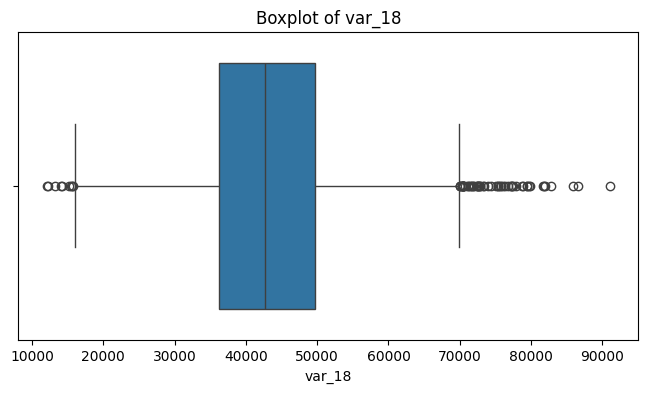

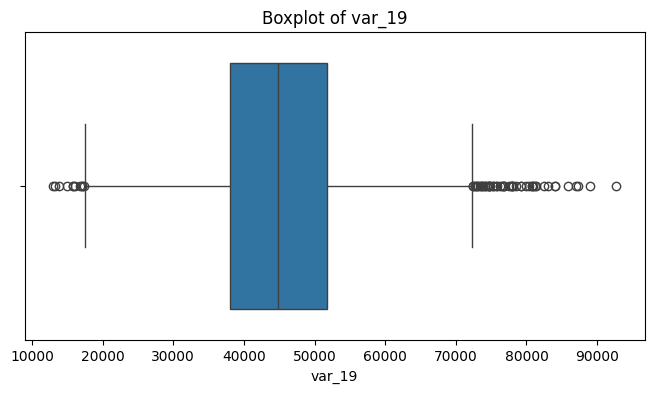

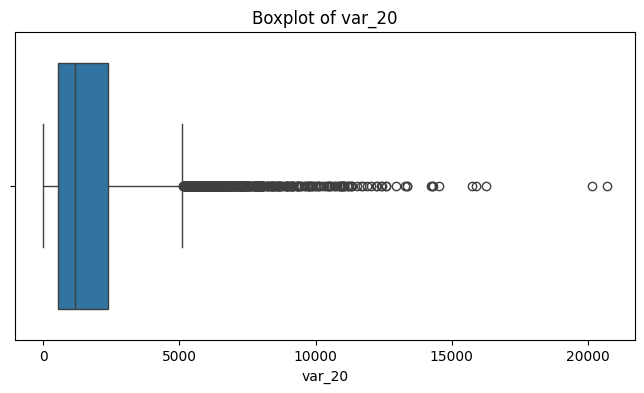

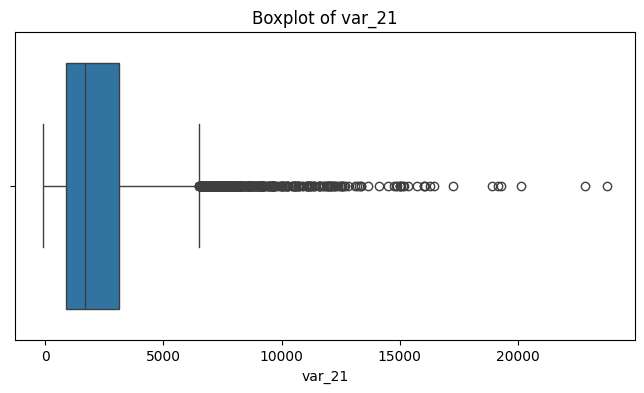

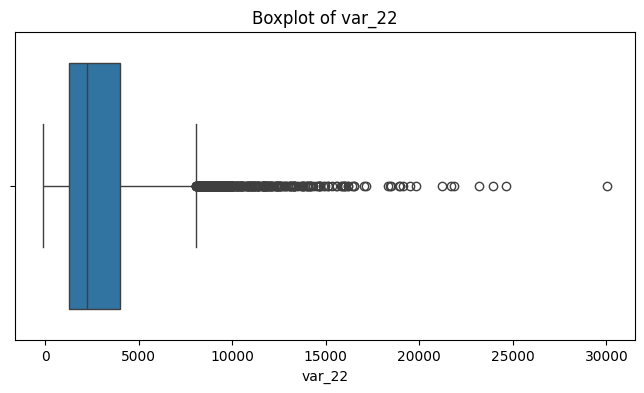

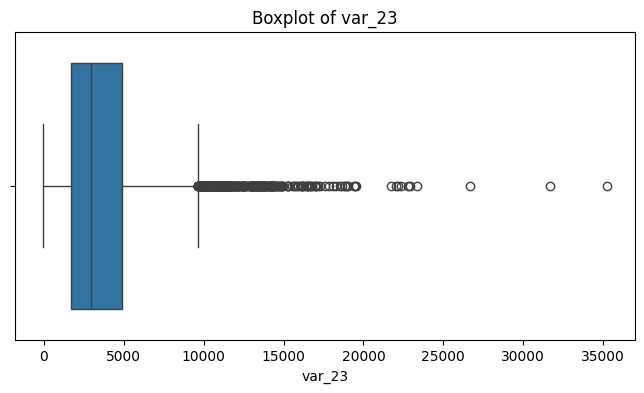

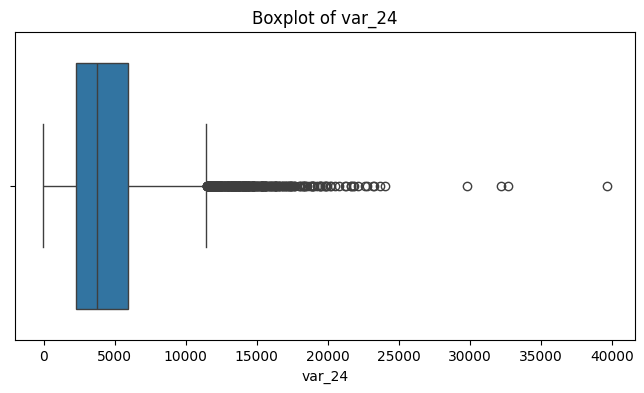

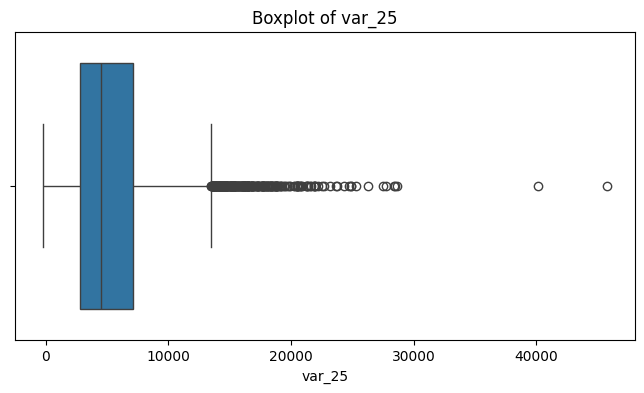

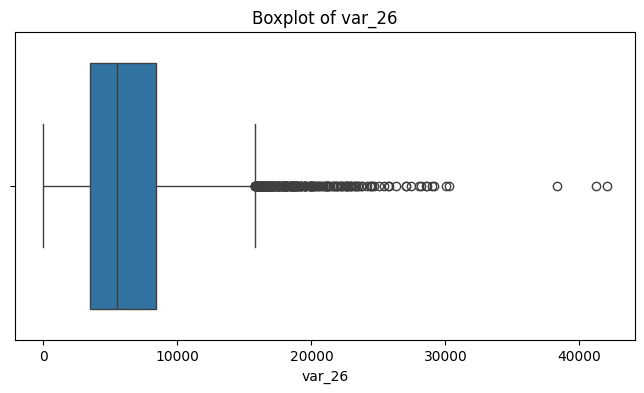

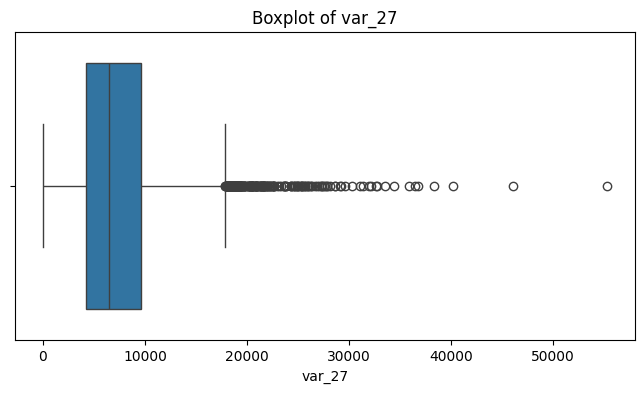

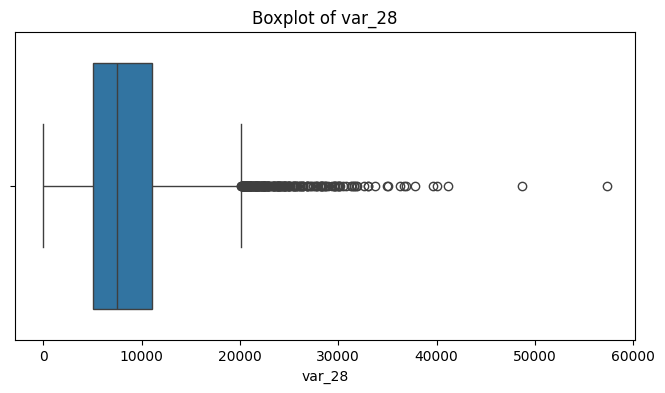

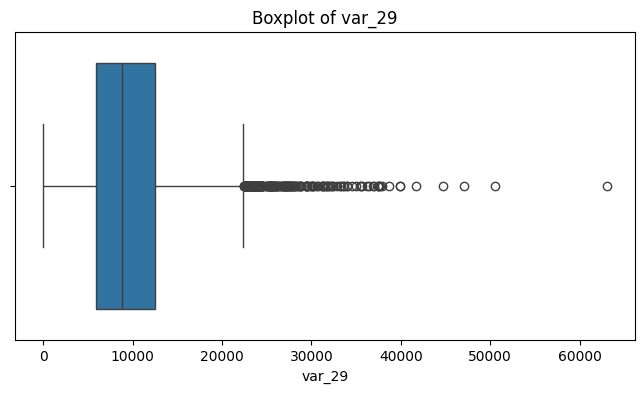

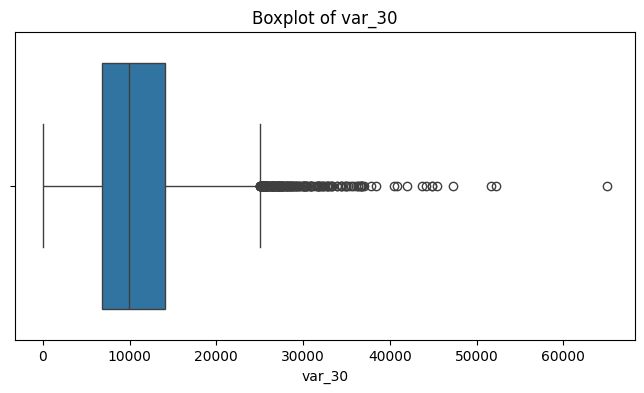

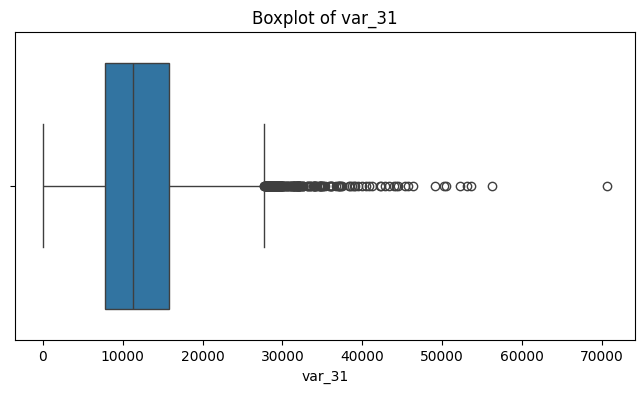

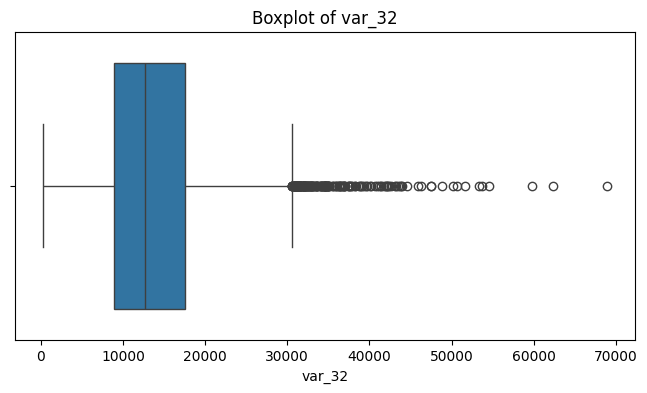

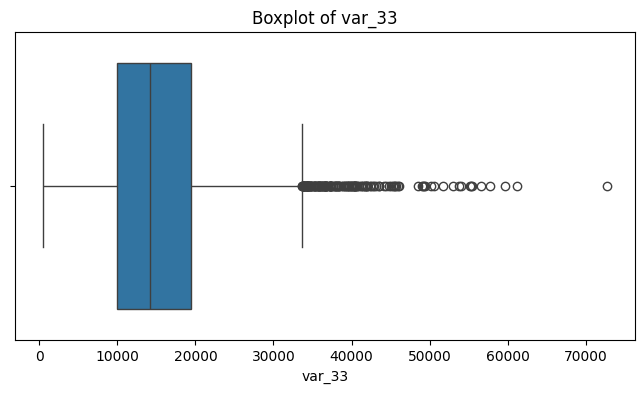

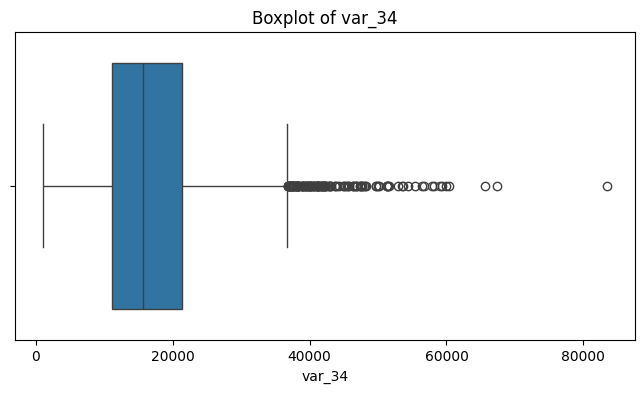

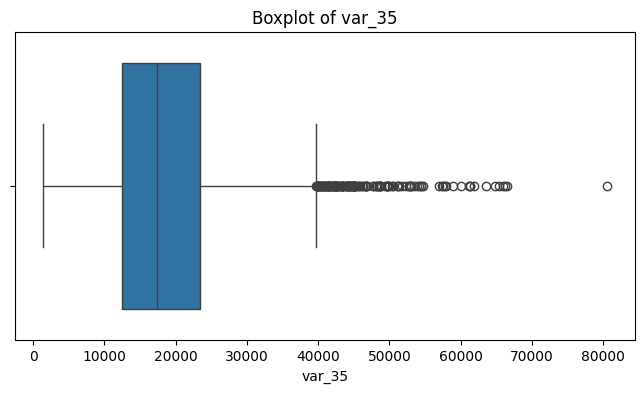

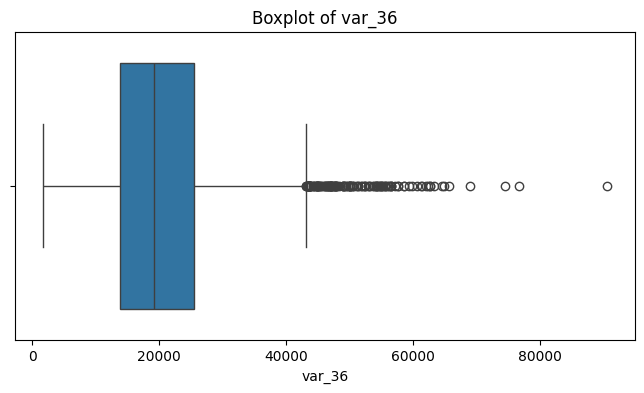

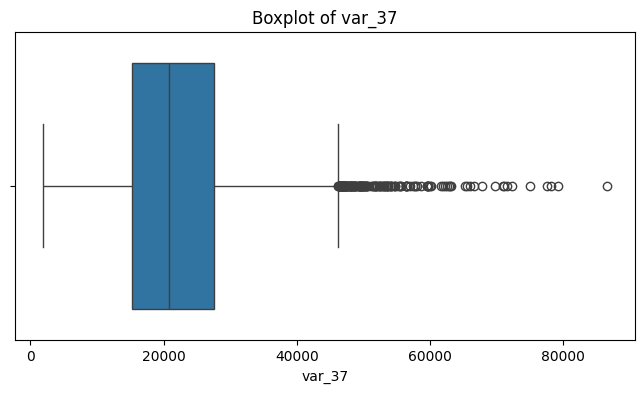

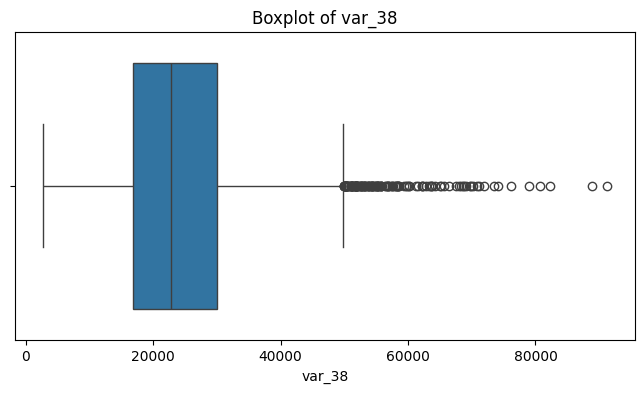

In [102]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### 2.1. First **Age**
Extreme ages above 100 years are unrealistic and likely due to data entry errors. These values were capped to preserve the variable while avoiding distortion.

In [104]:
df.loc[df['age'] > 100, 'age'] = 100


### 2.2 for vars 0 --> 38
For variables var_0 to var_38, numerous outliers were detected using the IQR method. However, exploratory analysis showed that these extreme values correspond to high-value customers with significantly lower churn rates. As these outliers represent meaningful business behavior rather than data errors, they were retained.

In [114]:
pd.set_option('display.max_rows', None)


## 3.Détection et traitement des valeurs aberrantes

In [115]:
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_pct[missing_pct > 0]

genre                            1.817407
espace_client_web                1.803209
assurance_vie                    1.860003
banque_principale                1.732216
anciennete_mois                  1.902598
compte_epargne                   2.115576
credit_autres                    1.803209
cartes_bancaires                 2.129774
compte_courant                   2.087179
compte_joint                     1.860003
PEA                              2.072980
assurance_auto                   1.930995
assurance_habitation             1.973591
credit_immo                      1.945194
type                            25.656680
compte_titres                    1.845804
methode_contact                  2.101377
agios_6mois                      2.087179
interet_compte_epargne_total     2.001988
age                              2.186568
segment_client                   2.229164
var_0                            2.129774
var_1                            1.959392
var_2                            2

#### 3.Low-missing categorical columns
- These columns also include **"inconnu"** in some rows.
- We keep **"inconnu"** as-is because it’s informative — it indicates unknown or missing customer info.
- For any other missing values **(NaN)**, which are very few **(~1–2%)**, we can fill them with the most frequent category **(mode)**.

In [125]:
cat_low_missing = ['genre', 'espace_client_web', 'assurance_vie', 'banque_principale', 
                   'segment_client', 'methode_contact', 'compte_titres', 'branche',
                   'compte_epargne', 'credit_autres', 'cartes_bancaires', 'compte_courant', 
                   'compte_joint', 'PEA', 'assurance_auto', 'assurance_habitation', 'credit_immo']
for col in cat_low_missing:
    df[col].fillna(df[col].mode()[0], inplace=True)

#### 4.Low-missing numerical columns

For our numerical columns, we observed different distributions:

1. **Age**
   - Distribution: Mostly between 20–55, with some extreme outliers (>80, some 120).  
   - Approach: Use **median** to replace missing values.  
   - Reason: Median is robust to outliers and skewed data, preventing extreme values from affecting the imputation.

2. **Anciennete_mois**
   - Distribution: Bimodal with peaks at 0–5 months and 70–72 months.  
   - Approach: Use **median**.  
   - Reason: Median captures the central tendency better than mean in bimodal data, and avoids being pulled by the long tails.

3. **Agios_6mois**
   - Distribution: Left-skewed (many clients pay low fees).  
   - Approach: Use **median**.  
   - Reason: Median is not affected by the few clients with very high fees, keeping imputed values realistic.

4. **Interet_compte_epargne_total**
   - Distribution: Right-skewed, long tail (few clients with very high interest).  
   - Approach: Use **median**.  
   - Reason: Median is robust to the few extreme values and preserves the main body of data.

5. **Other Numeric Variables (var_0 → var_38)**
   - Distribution: Some triangular, some right-skewed.  
   - Approach: Use **median**.  
   - Reason: Consistency across features and median is robust for both symmetric and skewed distributions.


In [127]:
numeric_cols = ['age', 'anciennete_mois', 'agios_6mois', 'interet_compte_epargne_total'] + [f'var_{i}' for i in range(0,39)]

for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    



In [128]:
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_pct[missing_pct > 0]

type    25.65668
dtype: float64

### 5. **Type** Missing values

The 'type' column in our dataset had a high percentage of missing values (~25%), making it important to fill them accurately to preserve the dataset's integrity and ensure meaningful downstream analyses. 

We chose an **advanced imputation approach using a Random Forest classifier** because it can leverage patterns in both numerical and categorical features to predict the missing values, rather than simply using mean, median, or a constant value.

**Main Steps Taken:**

1. **Separation of Known and Missing Data**  
   - Rows where 'type' is known are used to train the predictive model.  
   - Rows with missing 'type' values are held aside for prediction.

2. **Feature Selection**  
   - We selected all numerical columns (`age`, `anciennete_mois`, `interet_compte_epargne_total`, `agios_6mois`, `var_0 → var_38`) and low-missing categorical columns.  
   - These features provide relevant information to help predict the likely type of each client.

3. **Encoding Categorical Variables**  
   - Low-missing categorical columns are encoded using `LabelEncoder` to make them suitable for the Random Forest model.

4. **Model Training**  
   - A Random Forest classifier is trained on the known data to learn patterns that distinguish 'perso' and 'pro' clients.

5. **Prediction and Imputation**  
   - The trained model predicts the missing 'type' values.  
   - Predicted values are then inserted into the original DataFrame, ensuring all rows have a valid 'type'.

**Advantages of this Approach:**
- Preserves all rows in the dataset.  
- Uses existing patterns in the data for more accurate imputation.  
- Helps maintain quality for downstream machine learning tasks.  

This method is particularly suitable for columns with high missing values that have strong relationships with other features in the dataset.

##### 1. Check correlation for numeric columns

In [139]:
# Encode type temporarily
df_copy = df.copy()
df_copy['type_encoded'] = df_copy['type'].map({'perso':0, 'pro':1})  # adjust if needed

# Compute correlation with numeric columns
numeric_cols = ['age', 'anciennete_mois', 'agios_6mois', 'interet_compte_epargne_total'] + [f'var_{i}' for i in range(0,39)]
corrs = df_copy[numeric_cols + ['type_encoded']].corr()['type_encoded'].sort_values(ascending=False)

print(corrs)

type_encoded                    1.000000
agios_6mois                     0.023042
var_17                         -0.050532
var_36                         -0.051455
var_33                         -0.052927
var_37                         -0.052941
var_15                         -0.054876
var_18                         -0.055387
var_34                         -0.055854
var_38                         -0.056061
var_16                         -0.056074
var_31                         -0.056407
var_19                         -0.057868
var_14                         -0.059046
var_30                         -0.059462
var_35                         -0.059873
var_13                         -0.060333
var_32                         -0.061591
var_22                         -0.063047
var_28                         -0.063185
var_11                         -0.063938
var_24                         -0.065769
var_29                         -0.067060
var_26                         -0.067749
var_6           

In [138]:
cat_cols = ['genre', 'espace_client_web', 'assurance_vie', 'banque_principale', 
            'segment_client', 'methode_contact', 'compte_titres', 'branche',
            'compte_epargne', 'credit_autres', 'cartes_bancaires', 'compte_courant', 
            'compte_joint', 'PEA', 'assurance_auto', 'assurance_habitation', 'credit_immo']

for col in cat_cols:
    crosstab = pd.crosstab(df[col], df['type'], normalize='index')  # percentage per category
    print(f"\nColumn: {col}")
    print(crosstab)
   # crosstab.plot(kind='bar', stacked=True)
   # plt.title(f"type vs {col}")
   # plt.ylabel('Pourcentage')
   # plt.show()




Column: genre
type      perso       pro
genre                    
F      0.275563  0.724437
H      0.275250  0.724750

Column: espace_client_web
type                  perso       pro
espace_client_web                    
0.0                0.293898  0.706102
1.0                0.192909  0.807091

Column: assurance_vie
type              perso       pro
assurance_vie                    
non            0.210543  0.789457
oui            0.370353  0.629647

Column: banque_principale
type                  perso       pro
banque_principale                    
non                0.235887  0.764113
oui                0.399054  0.600946

Column: segment_client
type               perso       pro
segment_client                    
A1              0.291339  0.708661
A2              0.075000  0.925000
A3              0.075000  0.925000
A4              0.293065  0.706935
B1              0.320000  0.680000
B2              0.310937  0.689063
B3              0.076271  0.923729
B4              0.049587 

"""
### Column Selection for Predicting 'type'

We need to impute the missing values of the 'type' column using predictive modeling.
To do this, we select features that are **related to 'type'**, based on the correlation analysis for numeric columns
and crosstab analysis for categorical columns.

1. **Numeric Columns**  
From correlation with 'type_encoded', we observe:
- Strongest correlations (negative) with: 'anciennete_mois' (-0.51), 'interet_compte_epargne_total' (-0.38).  
- Other numeric variables (var_0 → var_38, agios_6mois) have very low correlations (<0.1), but we still include them 
  to capture potential non-linear patterns.

2. **Categorical Columns**  
From the crosstab with 'type', we see that some categories have uneven distributions:
- 'espace_client_web', 'assurance_vie', 'banque_principale', 'segment_client', 'methode_contact', 'compte_titres', 'cartes_bancaires', 'compte_courant', 'compte_joint', 'PEA', 'assurance_auto', 'assurance_habitation', 'credit_immo'  
  → These columns show clear differences between 'perso' and 'pro' clients and are therefore predictive.

3. **Other Columns**  
Columns where missing values are marked as 'inconnu' are also included since 'inconnu' might carry predictive information.

**Summary:**  
We use **all numeric variables**, plus **categorical columns that are related to 'type'** based on crosstab analysis, to train a Random Forest classifier to predict missing 'type' values.
"""


 ### imputing type using a predictive model

In [156]:
# Use a copy to avoid modifying original df until imputation
df_copy = df.copy()

# 1. Separate rows with known and missing 'type'
df_known = df_copy[df_copy['type'].notna()].copy()
df_missing = df_copy[df_copy['type'].isna()].copy()

# 2. Select numeric features
numeric_features = ['age', 'anciennete_mois', 'interet_compte_epargne_total', 'agios_6mois'] \
                   + [f'var_{i}' for i in range(0, 39)]

# 3. Select categorical features related to 'type' (based on previous analysis)
cat_features = ['genre', 'espace_client_web', 'assurance_vie', 'banque_principale', 
                'segment_client', 'methode_contact', 'compte_titres', 'cartes_bancaires',
                'compte_courant', 'compte_joint', 'PEA', 'assurance_auto', 
                'assurance_habitation', 'credit_immo']

# 4. Encode categorical features (LabelEncoder)
le_dict = {}
for col in cat_features:
    le = LabelEncoder()
    df_known[col] = le.fit_transform(df_known[col].astype(str))
    df_missing[col] = le.transform(df_missing[col].astype(str))
    le_dict[col] = le

# 5. Encode target variable
target_le = LabelEncoder()
y_known = target_le.fit_transform(df_known['type'])

# 6. Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df_known[numeric_features + cat_features], y_known)

# 7. Predict missing 'type'
pred_missing = rf.predict(df_missing[numeric_features + cat_features])

# 8. Fill predicted values in original dataframe
df.loc[df['type'].isna(), 'type'] = target_le.inverse_transform(pred_missing)

ValueError: Found array with 0 sample(s) (shape=(0, 57)) while a minimum of 1 is required by RandomForestClassifier.

## HERE We Extract the Cleaned Data

In [161]:
df.to_csv("../Data/cleanedData.csv", index=False)
